In [251]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone


#warning
import warnings
warnings.filterwarnings("ignore")


pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)

In [252]:
df = pd.read_csv("car_data_new.csv")

In [253]:
df.head()

Fiyat    İlan Tarihi       Marka         Seri                          Model   Yıl  Kilometre Vites Tipi Yakıt Tipi Kasa Tipi      Renk  Motor_Hacmi  Motor_Gucu        Çekiş  Ort_Yakit_Tuketimi  Yakit_Deposu  Hizlanma_0_100_Sn  Agirlik  Silindir_Sayisi
0 1475000.00  18 Kasım 2023       Honda        Civic  1.5 i-VTEC Eco Executive Plus  2023    6100.00   Otomatik     Benzin     Sedan      Mavi         1498         129  Önden Çekiş                6.50            47                248     2050             4.00
1  610000.00  18 Kasım 2023  Volkswagen       Passat            1.6 FSi Comfortline  2008  210000.00        Düz     Benzin     Sedan  Lacivert         1598         115  Önden Çekiş                7.50            70                180     1548             4.00
2  715000.00  18 Kasım 2023        Fiat         Egea            1.4 Fire Urban Plus  2020   69000.00        Düz     Benzin     Sedan     Beyaz         1368          95  Önden Çekiş                5.70            45                180     1548             4.00
3  620000.00  17 Kasım 2023     Hyundai  Accent Blue             1.6 CRDI Mode Plus  2012  199000.00   Otomatik      Dizel     Sedan      Füme         1582         128  Önden Çekiş                5.60            43                200     1798             4.00
4  618000.00  17 Kasım 2023     Citroen     C-Elysee              1.5 BlueHDi Shine  2021  101000.00        Düz      Dizel     Sedan     Beyaz         1499         100  Önden Çekiş                3.90            50                185     1675             4.00

In [254]:
df.drop(columns='İlan Tarihi',inplace=True)
df.drop(columns='Model',inplace=True)
df.drop(columns='Seri',inplace=True)

In [255]:
df.isnull().sum()

Fiyat                 0
Marka                 0
Yıl                   0
Kilometre             0
Vites Tipi            0
Yakıt Tipi            0
Kasa Tipi             0
Renk                  0
Motor_Hacmi           0
Motor_Gucu            0
Çekiş                 0
Ort_Yakit_Tuketimi    0
Yakit_Deposu          0
Hizlanma_0_100_Sn     0
Agirlik               0
Silindir_Sayisi       0
dtype: int64

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Fiyat               1900 non-null   float64
 1   Marka               1900 non-null   object 
 2   Yıl                 1900 non-null   int64  
 3   Kilometre           1900 non-null   float64
 4   Vites Tipi          1900 non-null   object 
 5   Yakıt Tipi          1900 non-null   object 
 6   Kasa Tipi           1900 non-null   object 
 7   Renk                1900 non-null   object 
 8   Motor_Hacmi         1900 non-null   int64  
 9   Motor_Gucu          1900 non-null   int64  
 10  Çekiş               1900 non-null   object 
 11  Ort_Yakit_Tuketimi  1900 non-null   float64
 12  Yakit_Deposu        1900 non-null   int64  
 13  Hizlanma_0_100_Sn   1900 non-null   int64  
 14  Agirlik             1900 non-null   int64  
 15  Silindir_Sayisi     1900 non-null   float64
dtypes: flo

In [257]:
df.describe([.25,0.5,0.75,1]).T

count           mean             std       min       25%       50%       75%              100%               max
Fiyat              1900.00 37249356206.05 743055089603.86 100000.00 438750.00 610000.00 799999.25 24000002350000.00 24000002350000.00
Yıl                1900.00        2011.56            6.28   1979.00   2007.00   2012.00   2016.00           2023.00           2023.00
Kilometre          1900.00      174668.43       102840.68      0.00 106000.00 166750.00 230000.00        1780000.00        1780000.00
Motor_Hacmi        1900.00        1486.64          249.49    796.00   1368.00   1461.00   1598.00           4398.00           4398.00
Motor_Gucu         1900.00         107.69           36.12     51.00     90.00    102.00    120.00            843.00            843.00
Ort_Yakit_Tuketimi 1900.00           5.52            1.38      3.40      4.40      5.20      6.50             12.30             12.30
Yakit_Deposu       1900.00          52.18            7.76     35.00     45.00     50.00     56.00             88.00             88.00
Hizlanma_0_100_Sn  1900.00         185.39           18.06    145.00    170.00    185.00    195.00            300.00            300.00
Agirlik            1900.00        1728.00          203.22   1059.00   1575.00   1710.00   1850.00           2555.00           2555.00
Silindir_Sayisi    1900.00           3.97            0.33      3.00      4.00      4.00      4.00              8.00              8.00

In [258]:
df[df["Fiyat"] > 10000000].head()

Fiyat    Marka   Yıl  Kilometre     Vites Tipi    Yakıt Tipi    Kasa Tipi         Renk  Motor_Hacmi  Motor_Gucu        Çekiş  Ort_Yakit_Tuketimi  Yakit_Deposu  Hizlanma_0_100_Sn  Agirlik  Silindir_Sayisi
22  895000885000.00  Peugeot  2014  133000.00  Yarı Otomatik         Dizel        Sedan        Siyah         1560         117  Önden Çekiş                4.00            72                188     1650             4.00
56  525000510000.00     Fiat  2012  140000.00            Düz         Dizel        Sedan  Gri (Gümüş)         1248          95  Önden Çekiş                4.90            45                190     1920             4.00
104 675000660000.00     Ford  2012   22000.00            Düz         Dizel  Hatchback/5        Beyaz         1398          70  Önden Çekiş                4.20            45                186     1770             4.00
112 595000565000.00     Ford  2010  319000.00       Otomatik  LPG & Benzin        Sedan     Lacivert         1596         100  Önden Çekiş                6.70            55                192     1900             4.00
119 780000760000.00  Renault  2016  188000.00            Düz         Dizel        Sedan         Mavi         1461         110  Önden Çekiş                4.60            60                190     1725             4.00

In [259]:
df[df["Fiyat"] > 10000000].shape

(34, 16)

In [260]:
filtrelenmis_df = df[df["Fiyat"] > 10000000]
df = df.drop(df[df["Fiyat"] > 10000000].index)

In [261]:
df.describe([.25,0.5,0.75,1]).T

count      mean       std       min       25%       50%       75%       100%        max
Fiyat              1866.00 672672.70 411575.63 100000.00 435000.00 605000.00 789375.00 5600000.00 5600000.00
Yıl                1866.00   2011.53      6.30   1979.00   2007.00   2012.00   2016.00    2023.00    2023.00
Kilometre          1866.00 175314.52 102950.75     21.00 107125.00 168000.00 230000.00 1780000.00 1780000.00
Motor_Hacmi        1866.00   1483.02    229.94    796.00   1368.00   1461.00   1598.00    4398.00    4398.00
Motor_Gucu         1866.00    106.92     28.49     51.00     90.00    102.00    120.00     333.00     333.00
Ort_Yakit_Tuketimi 1866.00      5.52      1.37      3.40      4.40      5.20      6.50      11.40      11.40
Yakit_Deposu       1866.00     52.17      7.75     35.00     45.00     50.00     56.00      88.00      88.00
Hizlanma_0_100_Sn  1866.00    185.35     18.07    145.00    170.00    184.00    195.00     300.00     300.00
Agirlik            1866.00   1727.91    203.04   1059.00   1575.00   1710.00   1850.00    2555.00    2555.00
Silindir_Sayisi    1866.00      3.97      0.33      3.00      4.00      4.00      4.00       8.00       8.00

In [262]:
## Fiyat

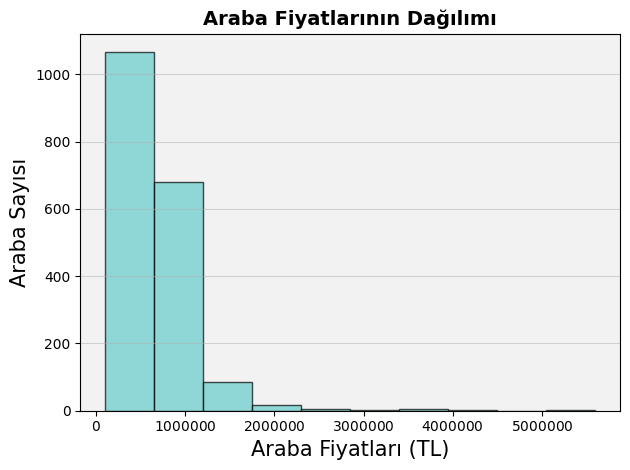

In [263]:
from matplotlib.ticker import ScalarFormatter
plt.hist(df['Fiyat'], bins=10, edgecolor='black', color='#66CCCC', alpha=0.7)
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='x')

plt.xlabel('Araba Fiyatları (TL)', fontsize=15)
plt.ylabel('Araba Sayısı', fontsize=15)
plt.title('Araba Fiyatlarının Dağılımı', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.5)
plt.gca().set_facecolor('#F2F2F2')
plt.tight_layout()
plt.show()

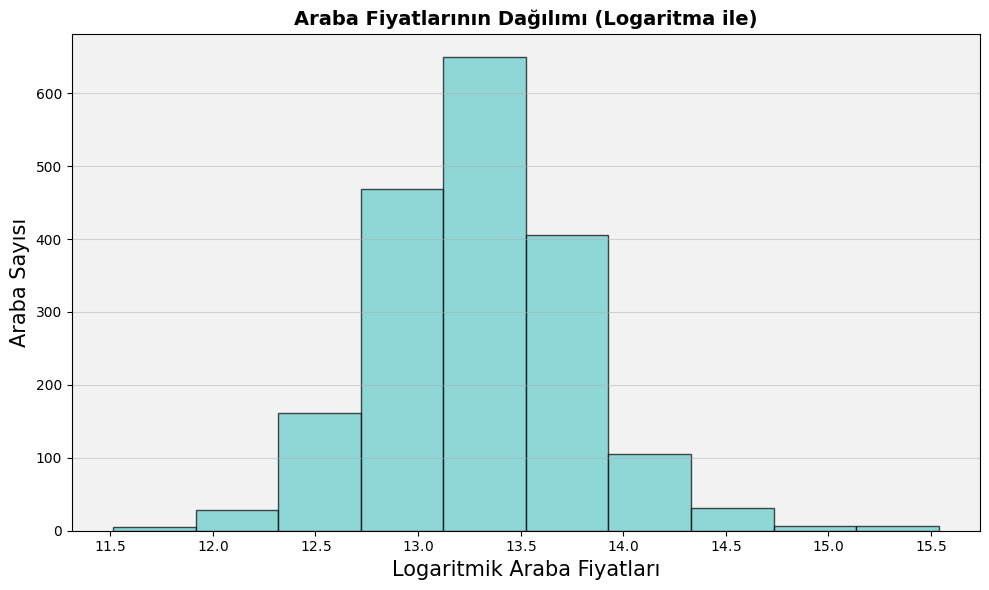

In [264]:
plt.figure(figsize=[10, 6])
plt.hist(np.log1p(df['Fiyat']), bins=10, edgecolor='black', color='#66CCCC', alpha=0.7)
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='x')

plt.xlabel('Logaritmik Araba Fiyatları', fontsize=15)
plt.ylabel('Araba Sayısı', fontsize=15)
plt.title('Araba Fiyatlarının Dağılımı (Logaritma ile)', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.5)
plt.gca().set_facecolor('#F2F2F2')
plt.tight_layout()
plt.show()

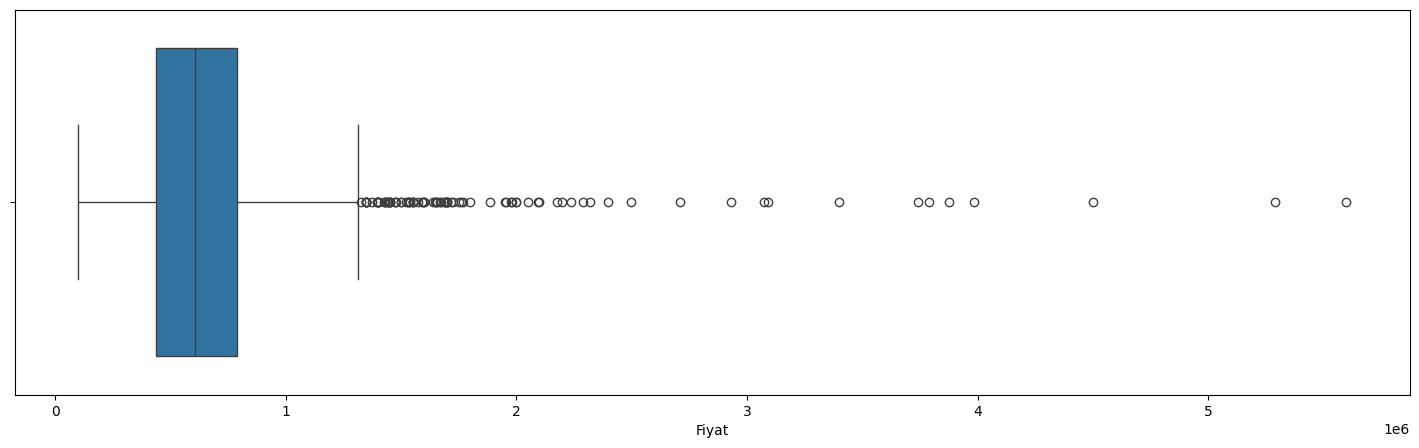

In [265]:
plt.figure(figsize=[18,5])
sns.boxplot(x=df['Fiyat'], data=df);

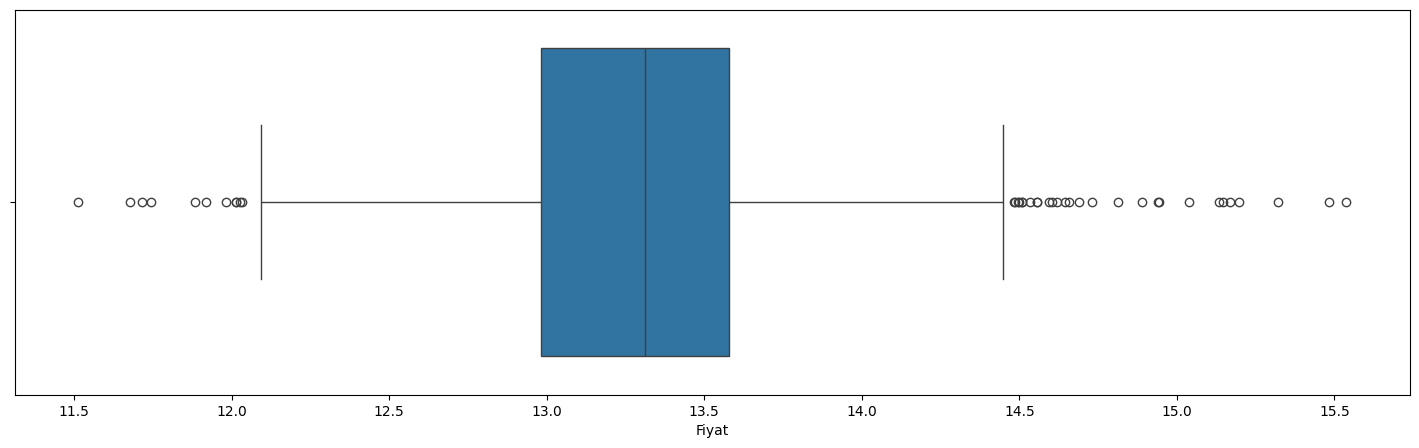

In [266]:
plt.figure(figsize=[18,5])
sns.boxplot(x=np.log1p(df['Fiyat']), data=df)
plt.show()

In [267]:
# Threshold setting function
def outlier_thresholds(dataframe,col_name,q1=0.25,q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    iqr = quartile3 - quartile1
    low_limit = quartile1 - 1.5*iqr
    up_limit = quartile3 + 1.5*iqr
    return low_limit,up_limit

# Is there an outlier or not?
def check_outlier(dataframe,col_name):
    low,up = outlier_thresholds(dataframe,col_name)
    if dataframe[(dataframe[col_name] < low) | (dataframe[col_name]>up)].any(axis=None):
        return True
    else:
        return False


# Which observations outlier ?
def grab_outliers(dataframe,col,index=False):
    low,up = outlier_thresholds(dataframe,col)
    if not dataframe[(dataframe[col] < low) | (dataframe[col] > up)].any(axis=None):
        print("There is no outlier")
        return 0
    if dataframe[(dataframe[col] < low) | (dataframe[col] > up)].shape[0] > 10:
        print(dataframe[(dataframe[col] < low) | (dataframe[col] > up)].head())
    else:
        print(dataframe[(dataframe[col] < low) | (dataframe[col] > up)])
    if index:
        return dataframe[(dataframe[col] < low) | (dataframe[col] > up)].index


# Removing outliers
def remove_outlier(dataframe,col):
    low,up = outlier_thresholds(dataframe,col)
    data_without_outliers = dataframe[~((dataframe[col] < low) | (dataframe[col]>up))]
    return data_without_outliers


In [268]:
grab_outliers(df,"Fiyat")

        Fiyat       Marka   Yıl  Kilometre     Vites Tipi    Yakıt Tipi    Kasa Tipi   Renk  Motor_Hacmi  Motor_Gucu          Çekiş  Ort_Yakit_Tuketimi  Yakit_Deposu  Hizlanma_0_100_Sn  Agirlik  Silindir_Sayisi
0  1475000.00       Honda  2023    6100.00       Otomatik        Benzin        Sedan   Mavi         1498         129    Önden Çekiş                6.50            47                248     2050             4.00
15 1980000.00         BMW  2005  208000.00       Otomatik  LPG & Benzin   Bilinmiyor  Diğer         4398         333   Arkadan İtiş               10.90            70                203     1840             4.00
60 2050000.00  Volkswagen  2017  100200.00  Yarı Otomatik         Dizel  Hatchback/5    Gri         1968         240  4WD (Sürekli)                5.90            66                164     1535             4.00
83 2100000.00         BMW  2016  255000.00       Otomatik         Dizel        Sedan  Beyaz         1995         218  4WD (Sürekli)                5.10     

In [269]:
# df = df.loc[(100000 < df['Fiyat']) & (df['Fiyat'] <= 2000000)]

In [270]:
# Yıllar

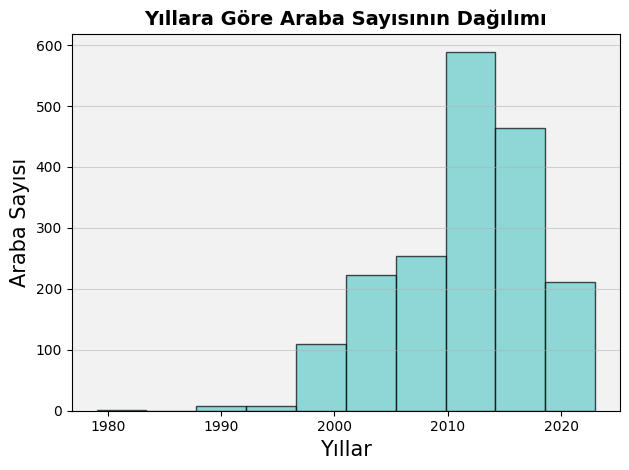

In [271]:
plt.hist(df['Yıl'], bins=10, edgecolor='black', color='#66CCCC', alpha=0.7)
plt.xlabel('Yıllar', fontsize=15)
plt.ylabel('Araba Sayısı', fontsize=15)
plt.title('Yıllara Göre Araba Sayısının Dağılımı', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.5)
plt.gca().set_facecolor('#F2F2F2')
plt.tight_layout()
plt.show()

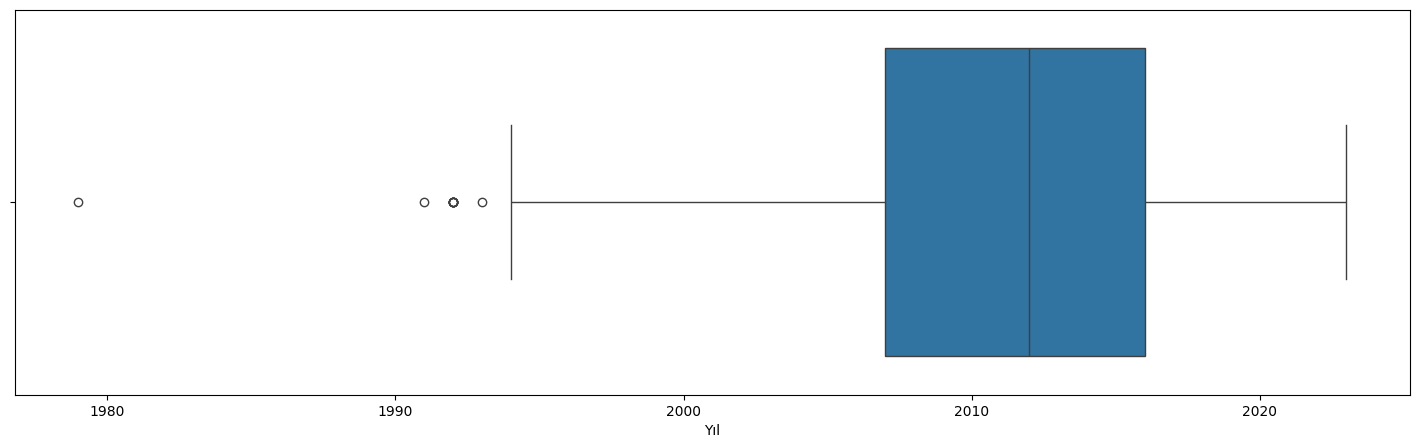

In [272]:
plt.figure(figsize=[18,5])
sns.boxplot(x=df['Yıl'], data=df);

In [273]:
grab_outliers(df,"Yıl")

         Fiyat            Marka   Yıl  Kilometre Vites Tipi    Yakıt Tipi Kasa Tipi            Renk  Motor_Hacmi  Motor_Gucu         Çekiş  Ort_Yakit_Tuketimi  Yakit_Deposu  Hizlanma_0_100_Sn  Agirlik  Silindir_Sayisi
673  150000.00            Tofaş  1992   36000.00        Düz  LPG & Benzin     Sedan  Mavi (metalik)         1581          83  Arkadan İtiş                6.50            50                182     1720             4.00
676  167000.00            Tofaş  1992  286000.00        Düz  LPG & Benzin     Sedan            Mavi         1581          83  Arkadan İtiş                6.50            50                181     1658             4.00
774  325000.00  Mercedes - Benz  1992  410000.00   Otomatik  LPG & Benzin     Sedan           Siyah         1998         136  Arkadan İtiş               11.10            70                193     1900             4.00
829  122500.00            Tofaş  1991  150000.00        Düz  LPG & Benzin     Sedan            Mavi         1581          83  Ar

In [274]:
df = remove_outlier(df,"Yıl")

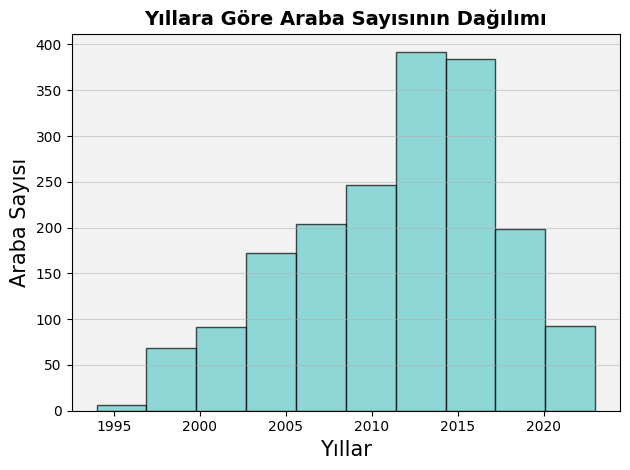

In [275]:
plt.hist(df['Yıl'], bins=10, edgecolor='black', color='#66CCCC', alpha=0.7)
plt.xlabel('Yıllar', fontsize=15)
plt.ylabel('Araba Sayısı', fontsize=15)
plt.title('Yıllara Göre Araba Sayısının Dağılımı', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.5)
plt.gca().set_facecolor('#F2F2F2')
plt.tight_layout()
plt.show()

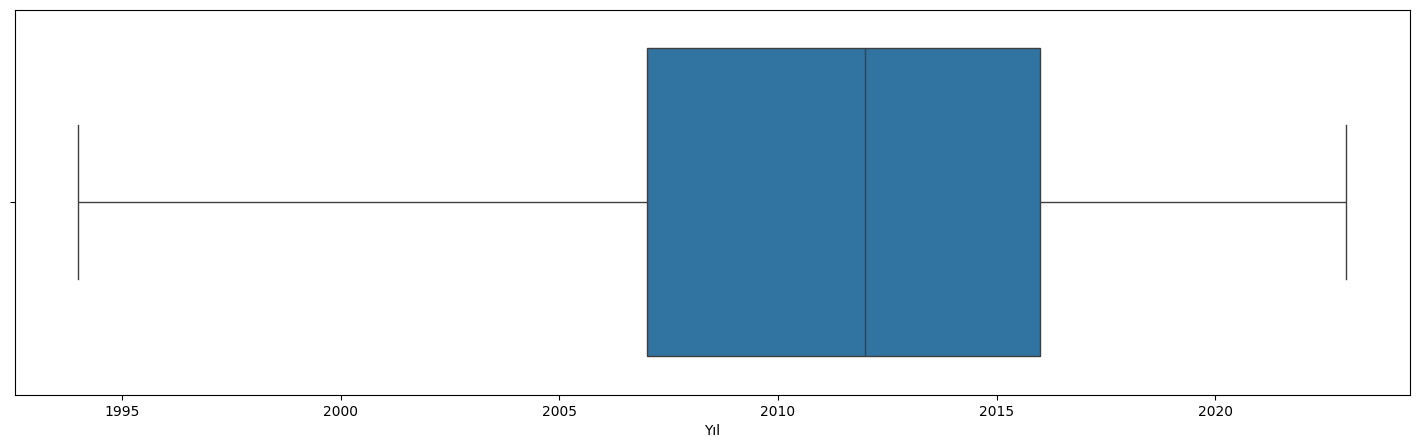

In [276]:
plt.figure(figsize=[18,5])
sns.boxplot(x=df['Yıl'], data=df);

In [277]:
df.describe([.25,0.5,0.75,1]).T

count      mean       std       min       25%       50%       75%       100%        max
Fiyat              1856.00 675425.51 410941.85 160000.00 437750.00 607250.00 790000.00 5600000.00 5600000.00
Yıl                1856.00   2011.64      6.12   1994.00   2007.00   2012.00   2016.00    2023.00    2023.00
Kilometre          1856.00 175290.58 102742.96     21.00 107875.00 168000.00 230000.00 1780000.00 1780000.00
Motor_Hacmi        1856.00   1482.38    230.14    796.00   1368.00   1461.00   1598.00    4398.00    4398.00
Motor_Gucu         1856.00    107.02     28.50     51.00     90.00    102.00    120.00     333.00     333.00
Ort_Yakit_Tuketimi 1856.00      5.51      1.36      3.40      4.40      5.20      6.50      11.40      11.40
Yakit_Deposu       1856.00     52.17      7.75     35.00     45.00     50.00     56.00      88.00      88.00
Hizlanma_0_100_Sn  1856.00    185.33     18.08    145.00    170.00    184.00    195.00     300.00     300.00
Agirlik            1856.00   1727.27    202.66   1059.00   1572.25   1708.00   1850.00    2555.00    2555.00
Silindir_Sayisi    1856.00      3.97      0.33      3.00      4.00      4.00      4.00       8.00       8.00

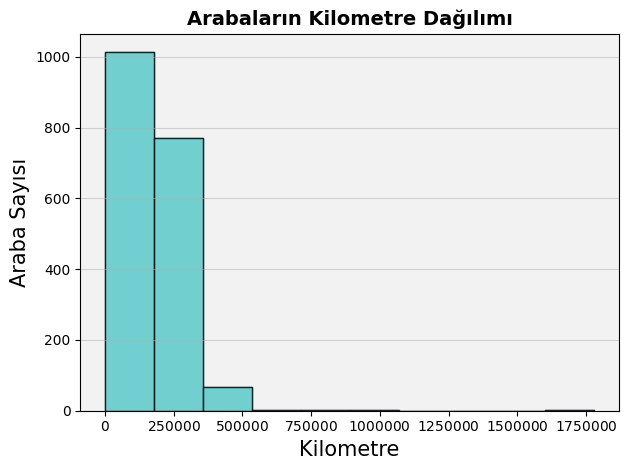

In [278]:
from matplotlib.ticker import ScalarFormatter
plt.hist(df['Kilometre'], bins=10, edgecolor='black', color='#66CCCC', alpha=0.7)
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='x')

plt.hist(df['Kilometre'], bins=10, edgecolor='black', color='#66CCCC', alpha=0.7)
plt.xlabel('Kilometre', fontsize=15)
plt.ylabel('Araba Sayısı', fontsize=15)
plt.title('Arabaların Kilometre Dağılımı', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.5)
plt.gca().set_facecolor('#F2F2F2')
plt.tight_layout()
plt.show()

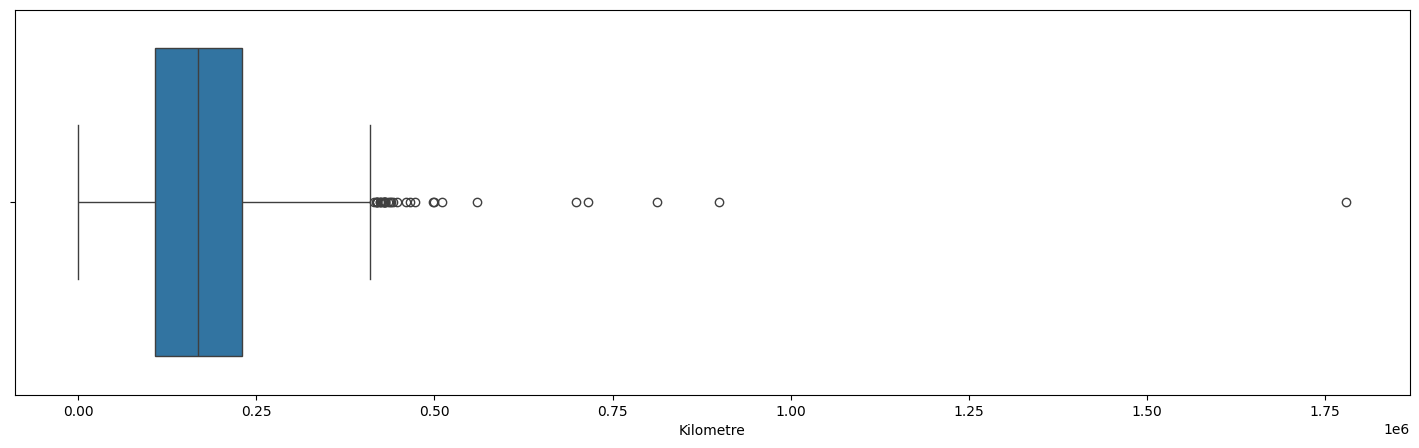

In [279]:
plt.figure(figsize=[18,5])
sns.boxplot(x=df['Kilometre'], data=df);

In [280]:
grab_outliers(df,"Kilometre")

         Fiyat            Marka   Yıl  Kilometre     Vites Tipi    Yakıt Tipi   Kasa Tipi         Renk  Motor_Hacmi  Motor_Gucu          Çekiş  Ort_Yakit_Tuketimi  Yakit_Deposu  Hizlanma_0_100_Sn  Agirlik  Silindir_Sayisi
113 1080000.00  Mercedes - Benz  2004  425000.00       Otomatik  LPG & Benzin       Sedan  Gri (Gümüş)         3199         224  4WD (Sürekli)               10.30            80                190     1945             4.00
227  350000.00          Hyundai  2009  430000.00            Düz         Dizel         MPV        Siyah         1493         110    Önden Çekiş                5.30            55                192     1693             4.00
245  775000.00       Volkswagen  2010  415000.00  Yarı Otomatik         Dizel  Bilinmiyor        Diğer         1968         170    Önden Çekiş                6.10            70                191     1730             4.00
277  425000.00           Toyota  2009  498000.00            Düz        Benzin       Sedan         Füme         1

In [281]:
df.shape

(1856, 16)

In [282]:
df = remove_outlier(df,"Kilometre")

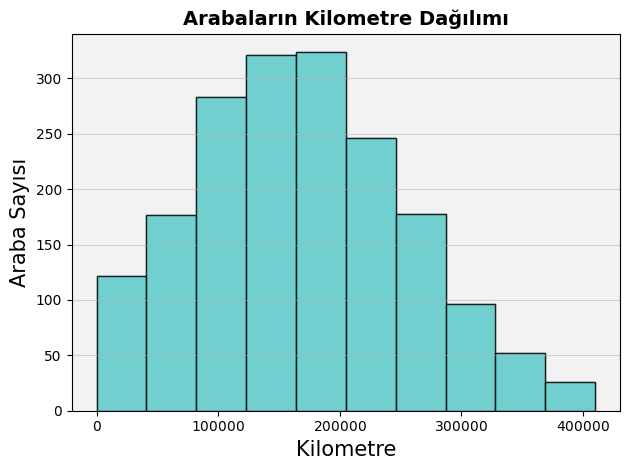

In [283]:
from matplotlib.ticker import ScalarFormatter
plt.hist(df['Kilometre'], bins=10, edgecolor='black', color='#66CCCC', alpha=0.7)
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='x')

plt.hist(df['Kilometre'], bins=10, edgecolor='black', color='#66CCCC', alpha=0.7)
plt.xlabel('Kilometre', fontsize=15)
plt.ylabel('Araba Sayısı', fontsize=15)
plt.title('Arabaların Kilometre Dağılımı', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.5)
plt.gca().set_facecolor('#F2F2F2')
plt.tight_layout()
plt.show()

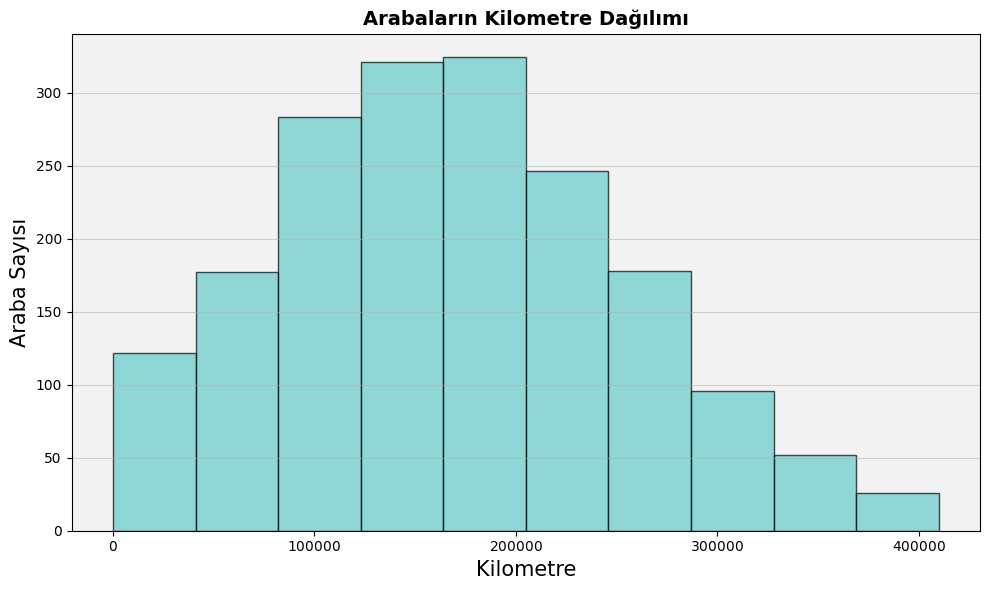

In [284]:
plt.figure(figsize=[10, 6])
plt.hist(df[df["Kilometre"] <= 500000]["Kilometre"], bins=10, edgecolor='black', color='#66CCCC', alpha=0.7)
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='x')

plt.xlabel('Kilometre', fontsize=15)
plt.ylabel('Araba Sayısı', fontsize=15)
plt.title('Arabaların Kilometre Dağılımı', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.5)
plt.gca().set_facecolor('#F2F2F2')
plt.tight_layout()
plt.show()

In [285]:
# Motor Hacmi

In [286]:
grab_outliers(df,"Motor_Hacmi")

        Fiyat            Marka   Yıl  Kilometre     Vites Tipi    Yakıt Tipi    Kasa Tipi         Renk  Motor_Hacmi  Motor_Gucu          Çekiş  Ort_Yakit_Tuketimi  Yakit_Deposu  Hizlanma_0_100_Sn  Agirlik  Silindir_Sayisi
15 1980000.00              BMW  2005  208000.00       Otomatik  LPG & Benzin   Bilinmiyor        Diğer         4398         333   Arkadan İtiş               10.90            70                203     1840             4.00
17  305000.00             Opel  2001  327000.00       Otomatik  LPG & Benzin        Sedan  Gri (Gümüş)         1998         136    Önden Çekiş                9.40            60                250     2070             8.00
29 1000000.00          Hyundai  2023    6500.00  Yarı Otomatik        Benzin  Hatchback/5      Kırmızı          998         100    Önden Çekiş                5.20            40                195     1870             4.00
33 1250000.00  Mercedes - Benz  2013  288000.00       Otomatik        Benzin        Sedan        Beyaz         1

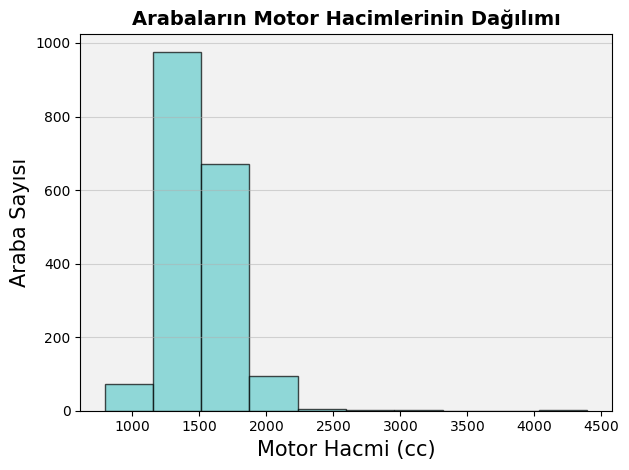

In [287]:
from matplotlib.ticker import ScalarFormatter
plt.hist(df['Motor_Hacmi'], bins=10, edgecolor='black', color='#66CCCC', alpha=0.7)
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='x')

plt.xlabel('Motor Hacmi (cc)', fontsize=15)
plt.ylabel('Araba Sayısı', fontsize=15)
plt.title('Arabaların Motor Hacimlerinin Dağılımı', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.5)
plt.gca().set_facecolor('#F2F2F2')
plt.tight_layout()
plt.show()

In [288]:
grab_outliers(df,"Motor_Hacmi")

        Fiyat            Marka   Yıl  Kilometre     Vites Tipi    Yakıt Tipi    Kasa Tipi         Renk  Motor_Hacmi  Motor_Gucu          Çekiş  Ort_Yakit_Tuketimi  Yakit_Deposu  Hizlanma_0_100_Sn  Agirlik  Silindir_Sayisi
15 1980000.00              BMW  2005  208000.00       Otomatik  LPG & Benzin   Bilinmiyor        Diğer         4398         333   Arkadan İtiş               10.90            70                203     1840             4.00
17  305000.00             Opel  2001  327000.00       Otomatik  LPG & Benzin        Sedan  Gri (Gümüş)         1998         136    Önden Çekiş                9.40            60                250     2070             8.00
29 1000000.00          Hyundai  2023    6500.00  Yarı Otomatik        Benzin  Hatchback/5      Kırmızı          998         100    Önden Çekiş                5.20            40                195     1870             4.00
33 1250000.00  Mercedes - Benz  2013  288000.00       Otomatik        Benzin        Sedan        Beyaz         1

In [289]:
df = remove_outlier(df,"Motor_Hacmi")

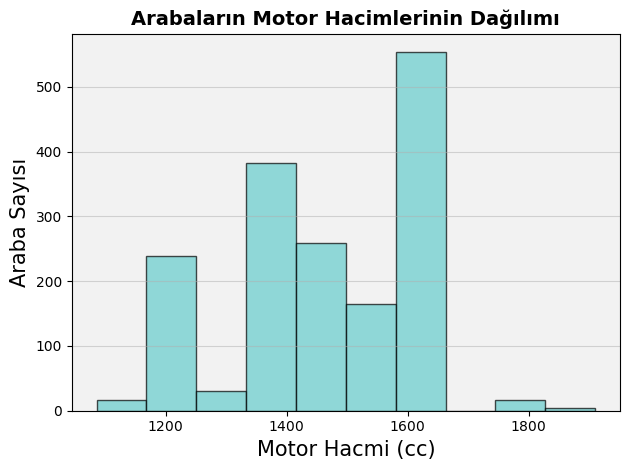

In [290]:
from matplotlib.ticker import ScalarFormatter
plt.hist(df['Motor_Hacmi'], bins=10, edgecolor='black', color='#66CCCC', alpha=0.7)
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='x')

plt.xlabel('Motor Hacmi (cc)', fontsize=15)
plt.ylabel('Araba Sayısı', fontsize=15)
plt.title('Arabaların Motor Hacimlerinin Dağılımı', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.5)
plt.gca().set_facecolor('#F2F2F2')
plt.tight_layout()
plt.show()

In [291]:
# Motor Gücü

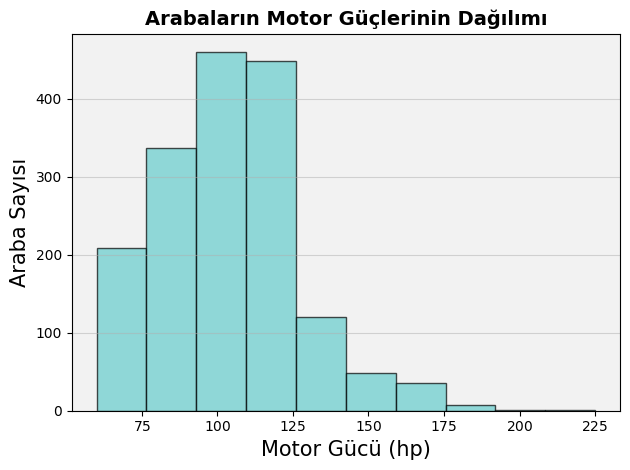

In [292]:
from matplotlib.ticker import ScalarFormatter
plt.hist(df['Motor_Gucu'], bins=10, edgecolor='black', color='#66CCCC', alpha=0.7)
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='x')

plt.xlabel('Motor Gücü (hp)', fontsize=15)
plt.ylabel('Araba Sayısı', fontsize=15)
plt.title('Arabaların Motor Güçlerinin Dağılımı', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.5)
plt.gca().set_facecolor('#F2F2F2')
plt.tight_layout()
plt.show()

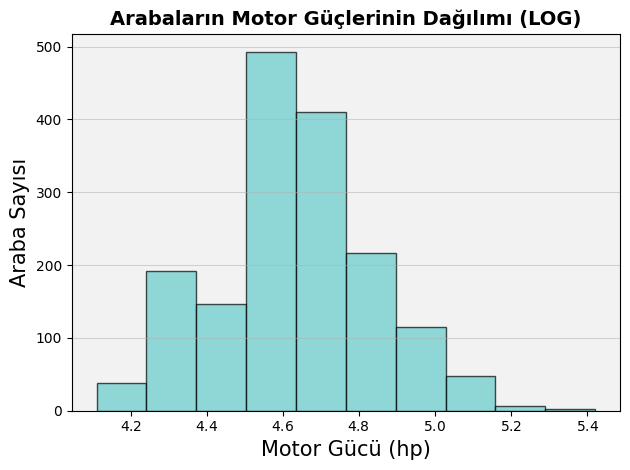

In [293]:
from matplotlib.ticker import ScalarFormatter
plt.hist(np.log1p(df['Motor_Gucu']), bins=10, edgecolor='black', color='#66CCCC', alpha=0.7)
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='x')

plt.xlabel('Motor Gücü (hp)', fontsize=15)
plt.ylabel('Araba Sayısı', fontsize=15)
plt.title('Arabaların Motor Güçlerinin Dağılımı (LOG)', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.5)
plt.gca().set_facecolor('#F2F2F2')
plt.tight_layout()
plt.show()

In [294]:
# Ortalama Yakıt Tüketimi

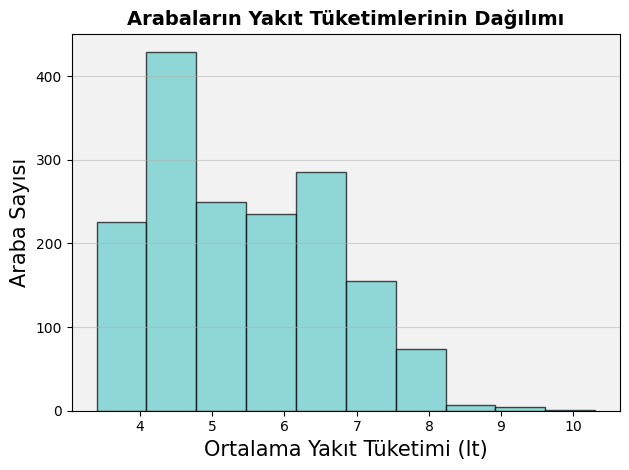

In [295]:
from matplotlib.ticker import ScalarFormatter
plt.hist(df["Ort_Yakit_Tuketimi"], bins=10, edgecolor='black', color='#66CCCC', alpha=0.7)
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='x')

plt.xlabel('Ortalama Yakıt Tüketimi (lt)', fontsize=15)
plt.ylabel('Araba Sayısı', fontsize=15)
plt.title('Arabaların Yakıt Tüketimlerinin Dağılımı', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.5)
plt.gca().set_facecolor('#F2F2F2')
plt.tight_layout()
plt.show()

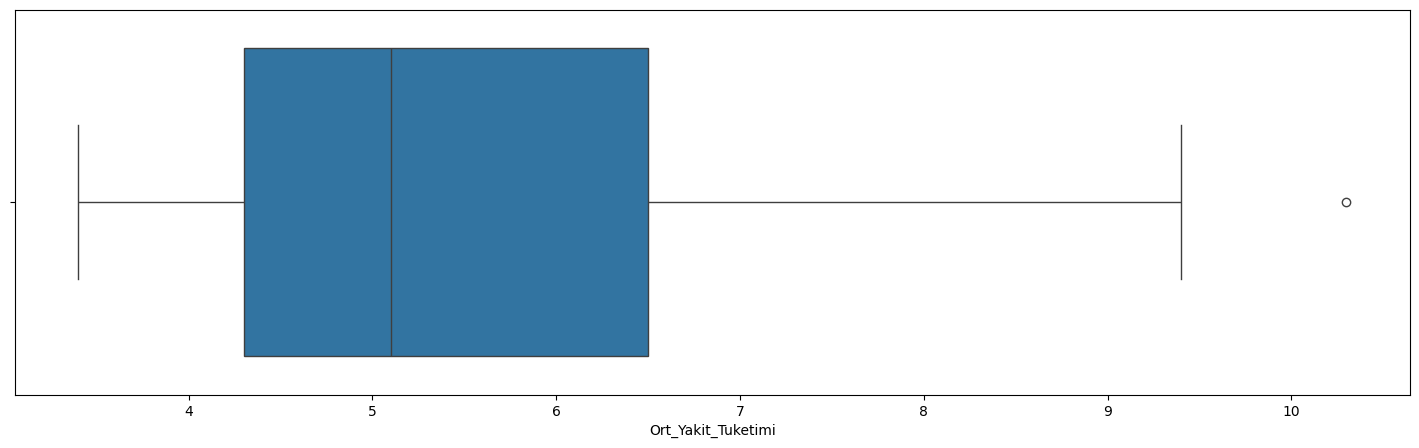

In [296]:
plt.figure(figsize=[18,5])
sns.boxplot(x=df['Ort_Yakit_Tuketimi'], data=df);

In [297]:
# Yakıt Deposu

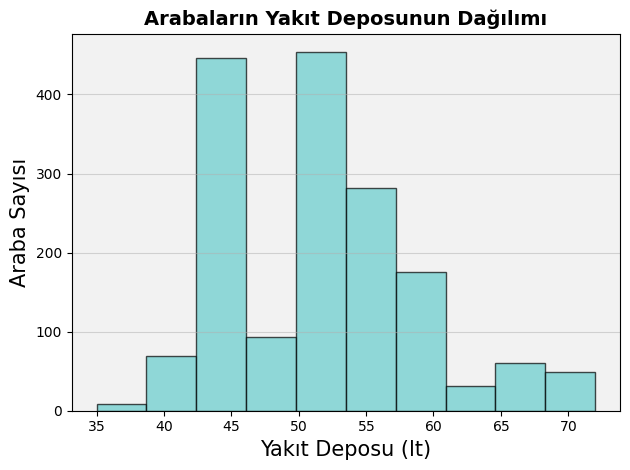

In [298]:
from matplotlib.ticker import ScalarFormatter
plt.hist(df["Yakit_Deposu"], bins=10, edgecolor='black', color='#66CCCC', alpha=0.7)
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='x')

plt.xlabel('Yakıt Deposu (lt)', fontsize=15)
plt.ylabel('Araba Sayısı', fontsize=15)
plt.title('Arabaların Yakıt Deposunun Dağılımı', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.5)
plt.gca().set_facecolor('#F2F2F2')
plt.tight_layout()
plt.show()

<Axes: xlabel='Yakit_Deposu'>

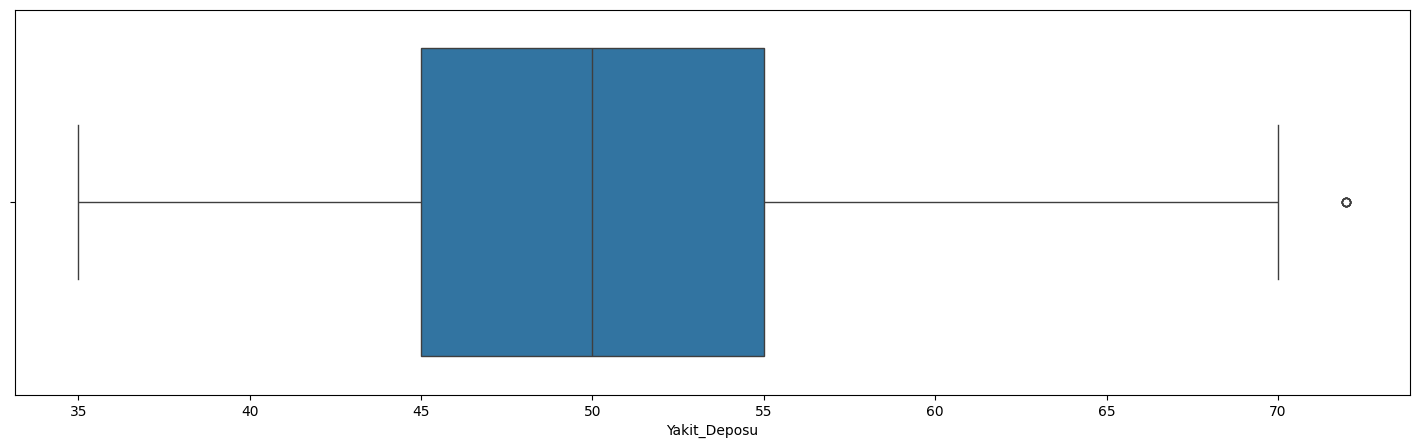

In [299]:
plt.figure(figsize=[18,5])
sns.boxplot(x=df['Yakit_Deposu'], data=df)

In [300]:
# Hızlanma

In [301]:
df.head()

Fiyat       Marka   Yıl  Kilometre Vites Tipi Yakıt Tipi Kasa Tipi      Renk  Motor_Hacmi  Motor_Gucu        Çekiş  Ort_Yakit_Tuketimi  Yakit_Deposu  Hizlanma_0_100_Sn  Agirlik  Silindir_Sayisi
0 1475000.00       Honda  2023    6100.00   Otomatik     Benzin     Sedan      Mavi         1498         129  Önden Çekiş                6.50            47                248     2050             4.00
1  610000.00  Volkswagen  2008  210000.00        Düz     Benzin     Sedan  Lacivert         1598         115  Önden Çekiş                7.50            70                180     1548             4.00
2  715000.00        Fiat  2020   69000.00        Düz     Benzin     Sedan     Beyaz         1368          95  Önden Çekiş                5.70            45                180     1548             4.00
3  620000.00     Hyundai  2012  199000.00   Otomatik      Dizel     Sedan      Füme         1582         128  Önden Çekiş                5.60            43                200     1798             4.00
4  618000.00     Citroen  2021  101000.00        Düz      Dizel     Sedan     Beyaz         1499         100  Önden Çekiş                3.90            50                185     1675             4.00

In [302]:
df['Maksimum Hız'] = df['Hizlanma_0_100_Sn']
df.drop(columns=['Hizlanma_0_100_Sn'], inplace=True)

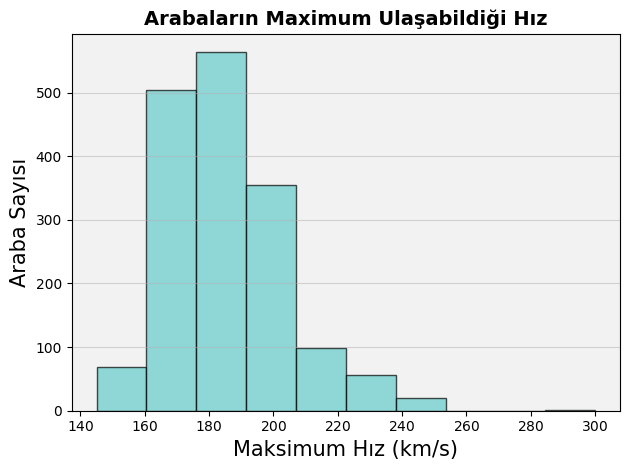

In [303]:
from matplotlib.ticker import ScalarFormatter
plt.hist(df["Maksimum Hız"], bins=10, edgecolor='black', color='#66CCCC', alpha=0.7)
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='x')

plt.xlabel('Maksimum Hız (km/s)', fontsize=15)
plt.ylabel('Araba Sayısı', fontsize=15)
plt.title('Arabaların Maximum Ulaşabildiği Hız', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.5)
plt.gca().set_facecolor('#F2F2F2')
plt.tight_layout()
plt.show()

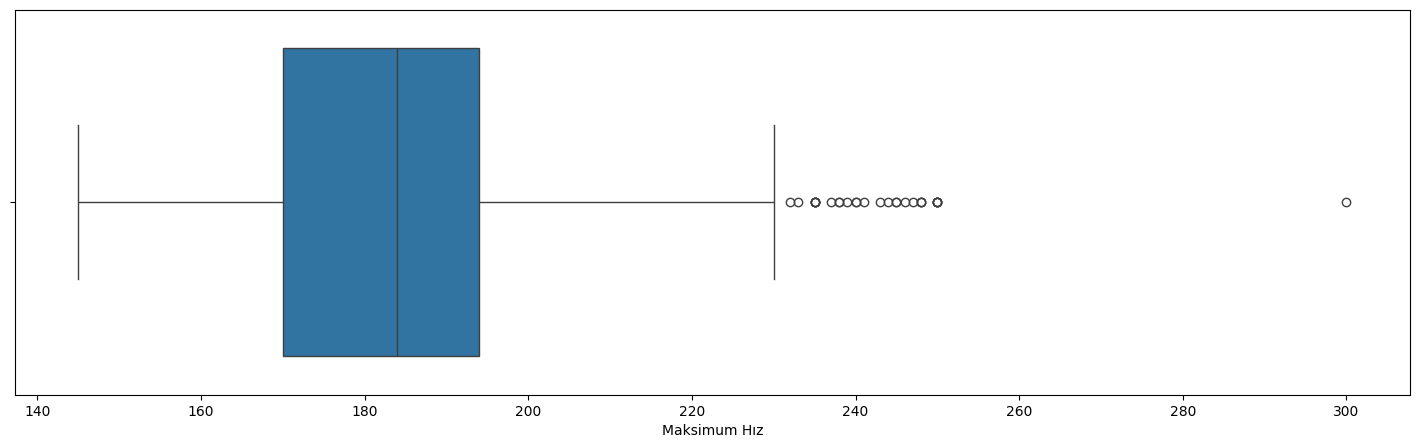

In [304]:
plt.figure(figsize=[18,5])
sns.boxplot(x=df['Maksimum Hız'], data=df);

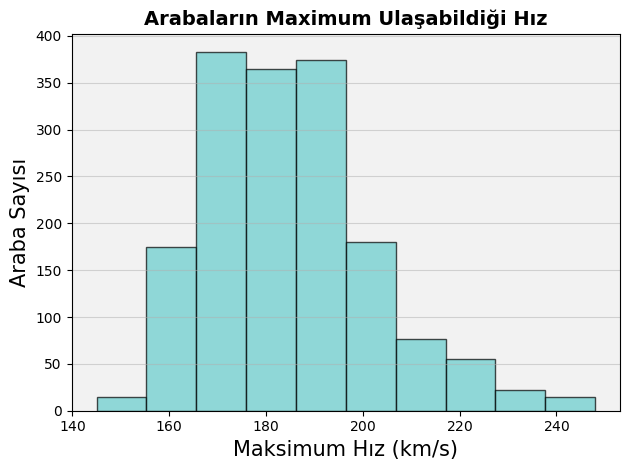

In [305]:
from matplotlib.ticker import ScalarFormatter
plt.hist(df[df["Maksimum Hız"] < 250 ]["Maksimum Hız"], bins=10, edgecolor='black', color='#66CCCC', alpha=0.7)
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='x')

plt.xlabel('Maksimum Hız (km/s)', fontsize=15)
plt.ylabel('Araba Sayısı', fontsize=15)
plt.title('Arabaların Maximum Ulaşabildiği Hız', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.5)
plt.gca().set_facecolor('#F2F2F2')
plt.tight_layout()
plt.show()

In [306]:
df = df[df["Maksimum Hız"] < 250]


In [307]:
# Agirlik

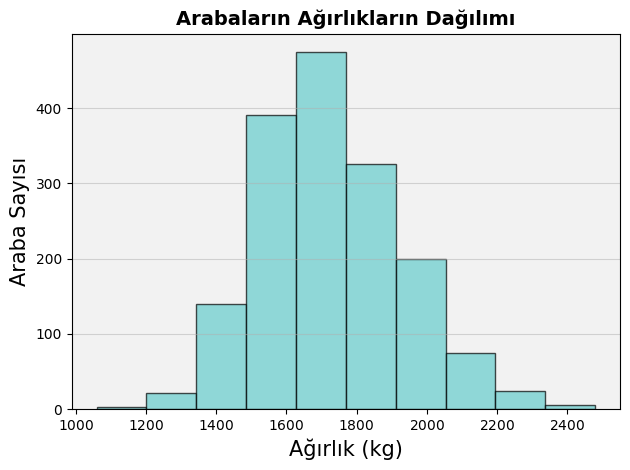

In [308]:
from matplotlib.ticker import ScalarFormatter
plt.hist(df["Agirlik"], bins=10, edgecolor='black', color='#66CCCC', alpha=0.7)
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='x')

plt.xlabel('Ağırlık (kg)', fontsize=15)
plt.ylabel('Araba Sayısı', fontsize=15)
plt.title('Arabaların Ağırlıkların Dağılımı', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.5)
plt.gca().set_facecolor('#F2F2F2')
plt.tight_layout()
plt.show()

In [309]:
df.head()

Fiyat       Marka   Yıl  Kilometre Vites Tipi Yakıt Tipi Kasa Tipi      Renk  Motor_Hacmi  Motor_Gucu        Çekiş  Ort_Yakit_Tuketimi  Yakit_Deposu  Agirlik  Silindir_Sayisi  Maksimum Hız
0 1475000.00       Honda  2023    6100.00   Otomatik     Benzin     Sedan      Mavi         1498         129  Önden Çekiş                6.50            47     2050             4.00           248
1  610000.00  Volkswagen  2008  210000.00        Düz     Benzin     Sedan  Lacivert         1598         115  Önden Çekiş                7.50            70     1548             4.00           180
2  715000.00        Fiat  2020   69000.00        Düz     Benzin     Sedan     Beyaz         1368          95  Önden Çekiş                5.70            45     1548             4.00           180
3  620000.00     Hyundai  2012  199000.00   Otomatik      Dizel     Sedan      Füme         1582         128  Önden Çekiş                5.60            43     1798             4.00           200
4  618000.00     Citroen  2021  101000.00        Düz      Dizel     Sedan     Beyaz         1499         100  Önden Çekiş                3.90            50     1675             4.00           185

In [310]:
marka_ = df.groupby('Marka')['Fiyat'].mean().sort_values(ascending=False).reset_index().head(20)


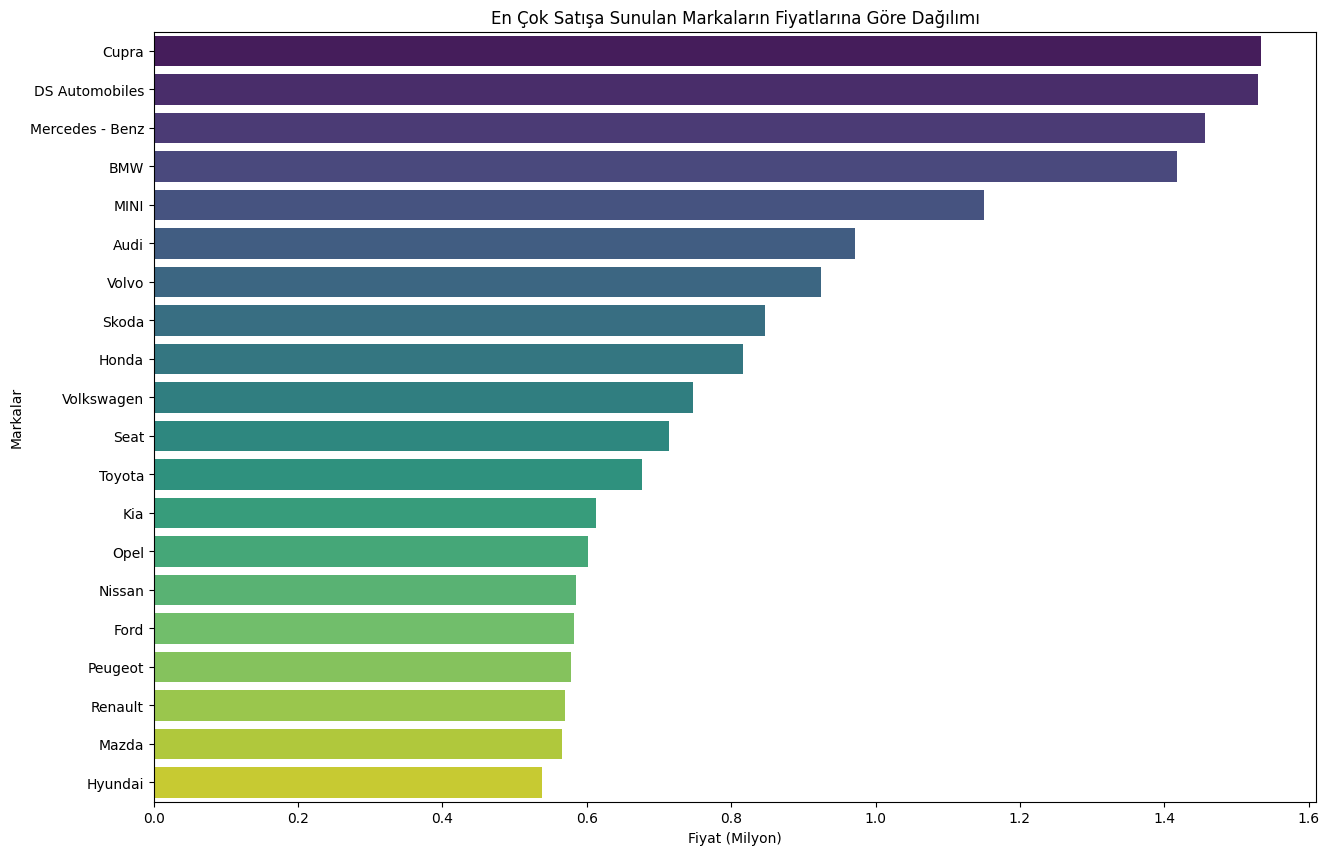

In [311]:
plt.figure(figsize=(15, 10))
sns.barplot(x=marka_['Fiyat'] / 1e6, y='Marka', data=marka_, palette='viridis')
plt.xlabel('Fiyat (Milyon)')
plt.ylabel('Markalar')
plt.title('En Çok Satışa Sunulan Markaların Fiyatlarına Göre Dağılımı')
plt.show()

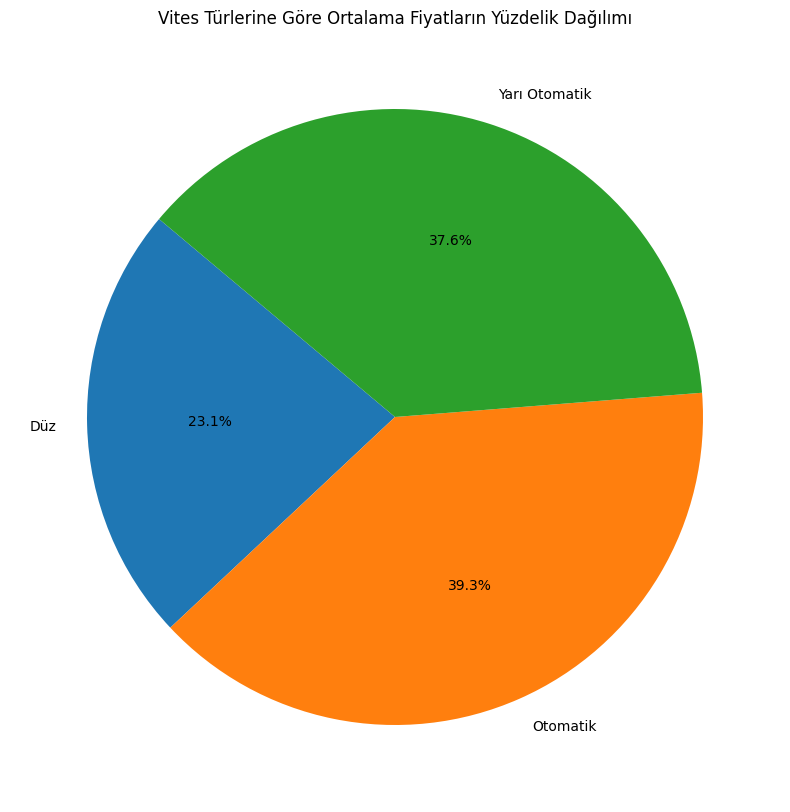

In [312]:
vites_ortalama_fiyat = df.groupby('Vites Tipi')['Fiyat'].mean().reset_index()

vites_ortalama_fiyat['Yüzde'] = (vites_ortalama_fiyat['Fiyat'] / vites_ortalama_fiyat['Fiyat'].sum()) * 100

# Görselleştirme
plt.figure(figsize=(10, 10))
plt.pie(vites_ortalama_fiyat['Yüzde'], labels=vites_ortalama_fiyat['Vites Tipi'], autopct='%1.1f%%',  startangle=140)
plt.title('Vites Türlerine Göre Ortalama Fiyatların Yüzdelik Dağılımı')
plt.show()

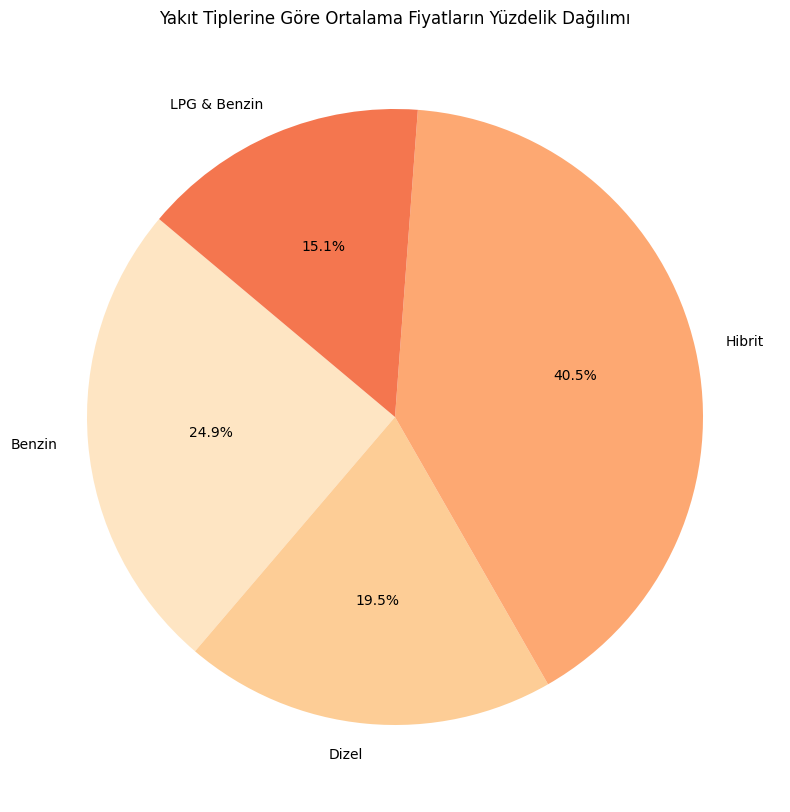

In [313]:
yakit_ortalama_fiyat = df.groupby('Yakıt Tipi')['Fiyat'].mean().reset_index()


yakit_ortalama_fiyat['Yüzde'] = (yakit_ortalama_fiyat['Fiyat'] / yakit_ortalama_fiyat['Fiyat'].sum()) * 100


plt.figure(figsize=(10, 10))
plt.pie(yakit_ortalama_fiyat['Yüzde'], labels=yakit_ortalama_fiyat['Yakıt Tipi'], autopct='%1.1f%%', colors=sns.color_palette('OrRd'), startangle=140)
plt.title('Yakıt Tiplerine Göre Ortalama Fiyatların Yüzdelik Dağılımı')
plt.show()

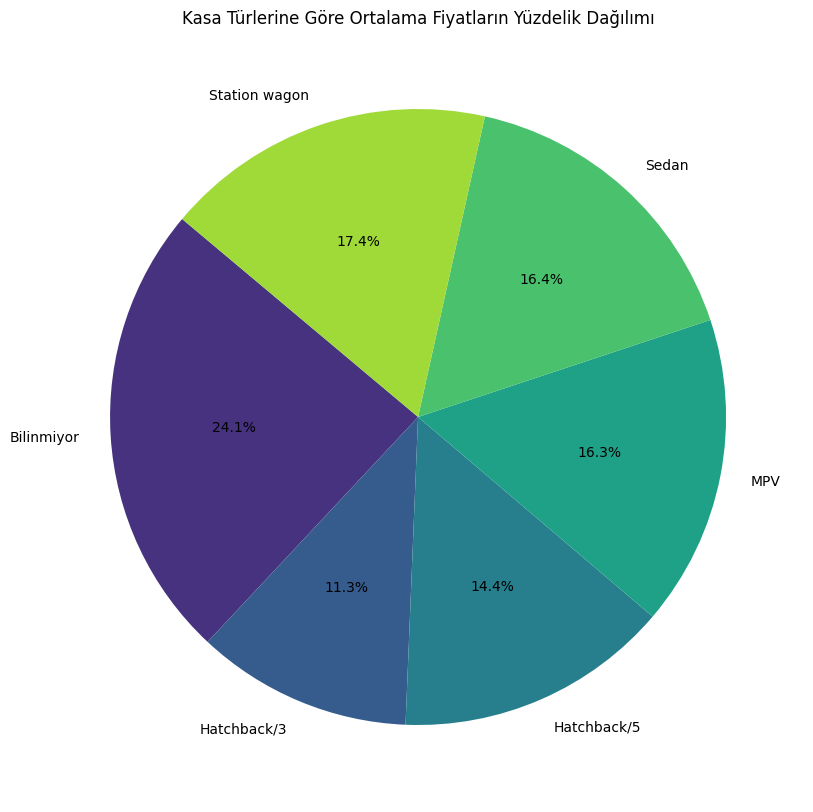

In [314]:
kasa_ortalama_fiyat = df.groupby('Kasa Tipi')['Fiyat'].mean().reset_index()


kasa_ortalama_fiyat['Yüzde'] = (kasa_ortalama_fiyat['Fiyat'] / kasa_ortalama_fiyat['Fiyat'].sum()) * 100

plt.figure(figsize=(10, 10))
plt.pie(kasa_ortalama_fiyat['Yüzde'], labels=kasa_ortalama_fiyat['Kasa Tipi'], autopct='%1.1f%%', colors=sns.color_palette('viridis'), startangle=140)
plt.title('Kasa Türlerine Göre Ortalama Fiyatların Yüzdelik Dağılımı')
plt.show()

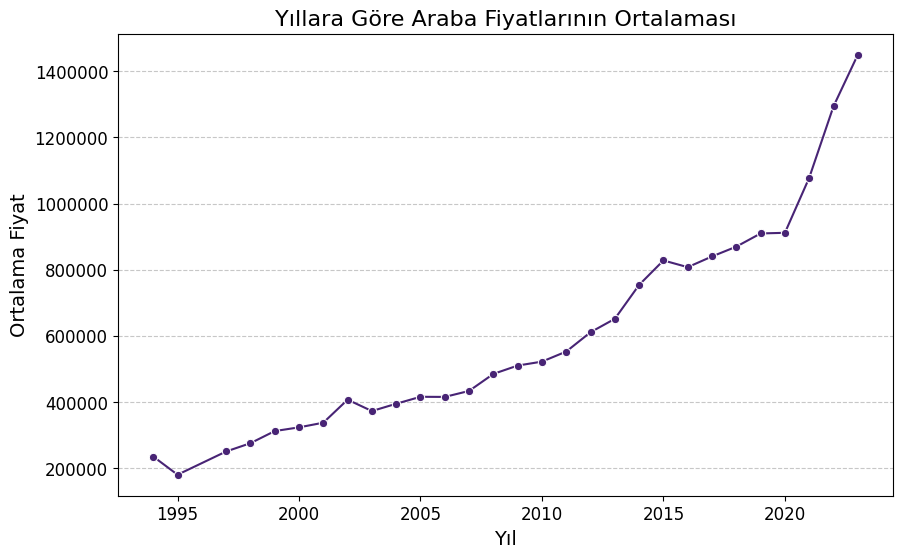

In [315]:
ortalama_fiyatlar = df.groupby('Yıl')['Fiyat'].mean().reset_index()


colors = sns.color_palette("viridis", len(ortalama_fiyatlar))


plt.figure(figsize=(10, 6))
sns.lineplot(x='Yıl', y='Fiyat', data=ortalama_fiyatlar, marker='o', color=colors[2])

plt.ticklabel_format(style='plain', axis='y') 


plt.title('Yıllara Göre Araba Fiyatlarının Ortalaması', fontsize=16)
plt.xlabel('Yıl', fontsize=14)
plt.ylabel('Ortalama Fiyat', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

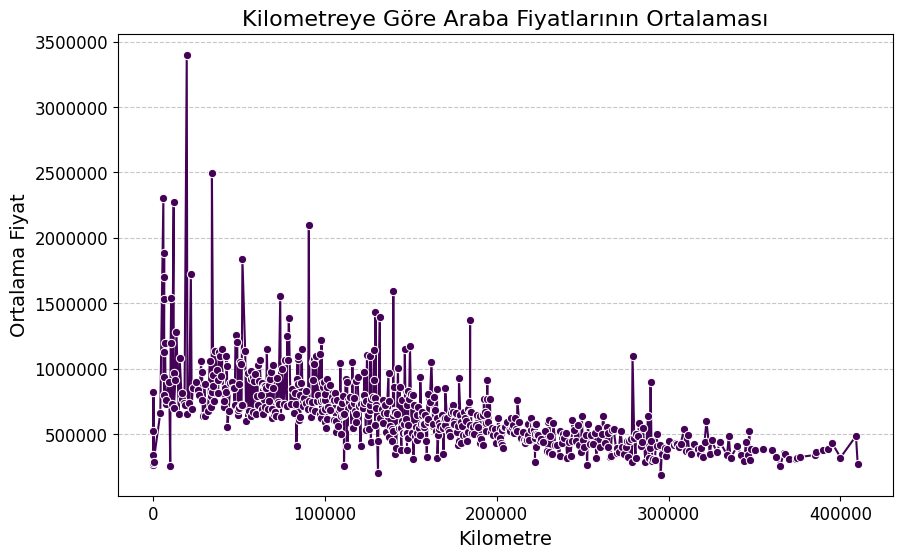

In [316]:

ortalama_fiyatlar = df.groupby('Kilometre')['Fiyat'].mean().reset_index()


colors = sns.color_palette("viridis", len(ortalama_fiyatlar))

plt.figure(figsize=(10, 6))
sns.lineplot(x='Kilometre', y='Fiyat', data=ortalama_fiyatlar, marker='o', color=colors[2])

plt.ticklabel_format(style='plain', axis='y')  # Y ekseni değerlerini bilimsel gösterimden kaldırma

plt.title('Kilometreye Göre Araba Fiyatlarının Ortalaması', fontsize=16)
plt.xlabel('Kilometre', fontsize=14)
plt.ylabel('Ortalama Fiyat', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

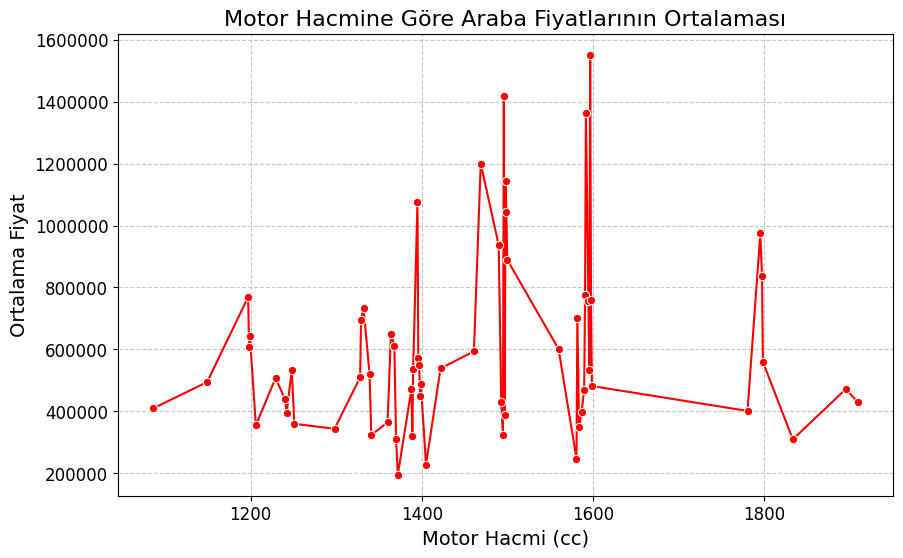

In [317]:

ortalama_fiyatlar = df.groupby('Motor_Hacmi')['Fiyat'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Motor_Hacmi', y='Fiyat', data=ortalama_fiyatlar, marker='o', color='red')

plt.ticklabel_format(style='plain', axis='y')
plt.title('Motor Hacmine Göre Araba Fiyatlarının Ortalaması', fontsize=16)
plt.xlabel('Motor Hacmi (cc)', fontsize=14)
plt.ylabel('Ortalama Fiyat', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)

plt.show()

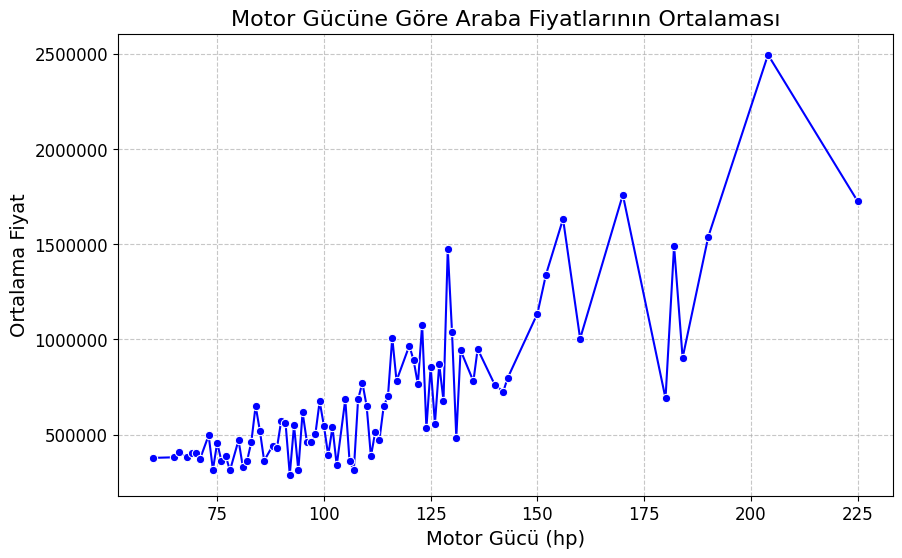

In [318]:
ortalama_fiyatlar = df.groupby('Motor_Gucu')['Fiyat'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(x='Motor_Gucu', y='Fiyat', data=ortalama_fiyatlar, marker='o', color='blue')

plt.ticklabel_format(style='plain', axis='y')

plt.title('Motor Gücüne Göre Araba Fiyatlarının Ortalaması', fontsize=16)
plt.xlabel('Motor Gücü (hp)', fontsize=14)
plt.ylabel('Ortalama Fiyat', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)

plt.show()

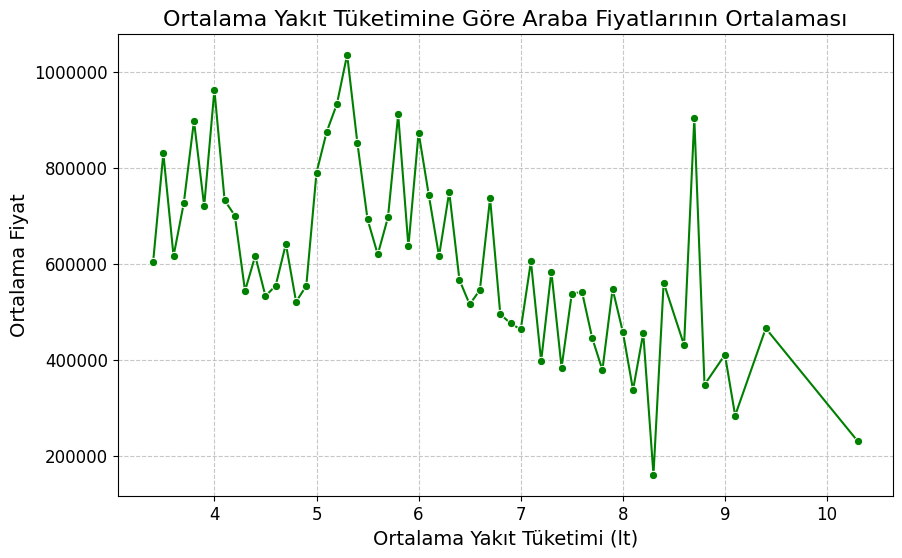

In [319]:
ortalama_fiyatlar = df.groupby('Ort_Yakit_Tuketimi')['Fiyat'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Ort_Yakit_Tuketimi', y='Fiyat', data=ortalama_fiyatlar, marker='o', color='green')

plt.ticklabel_format(style='plain', axis='y')

plt.title('Ortalama Yakıt Tüketimine Göre Araba Fiyatlarının Ortalaması', fontsize=16)
plt.xlabel('Ortalama Yakıt Tüketimi (lt)', fontsize=14)
plt.ylabel('Ortalama Fiyat', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)

plt.show()

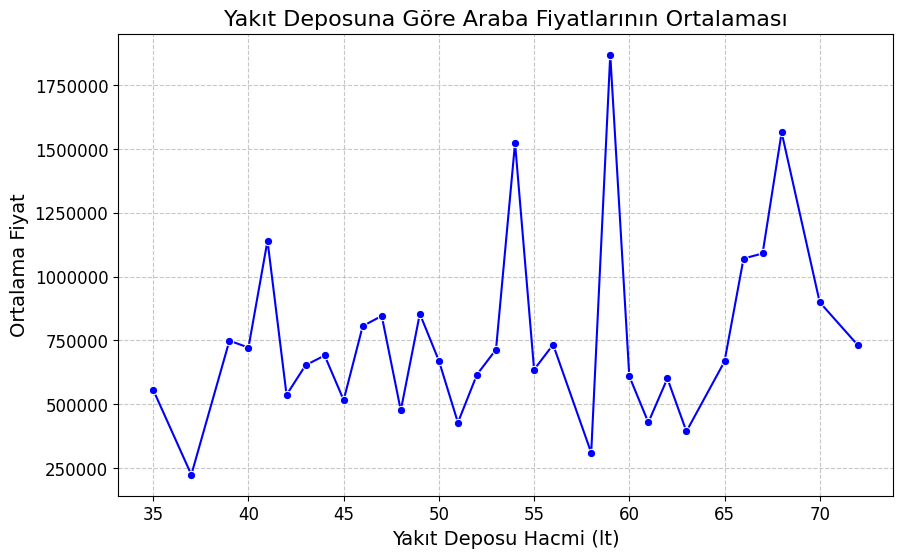

In [320]:
ortalama_fiyatlar = df.groupby('Yakit_Deposu')['Fiyat'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(x='Yakit_Deposu', y='Fiyat', data=ortalama_fiyatlar, marker='o', color='blue')

plt.ticklabel_format(style='plain', axis='y')
plt.title('Yakıt Deposuna Göre Araba Fiyatlarının Ortalaması', fontsize=16)
plt.xlabel('Yakıt Deposu Hacmi (lt)', fontsize=14)
plt.ylabel('Ortalama Fiyat', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)

plt.show()

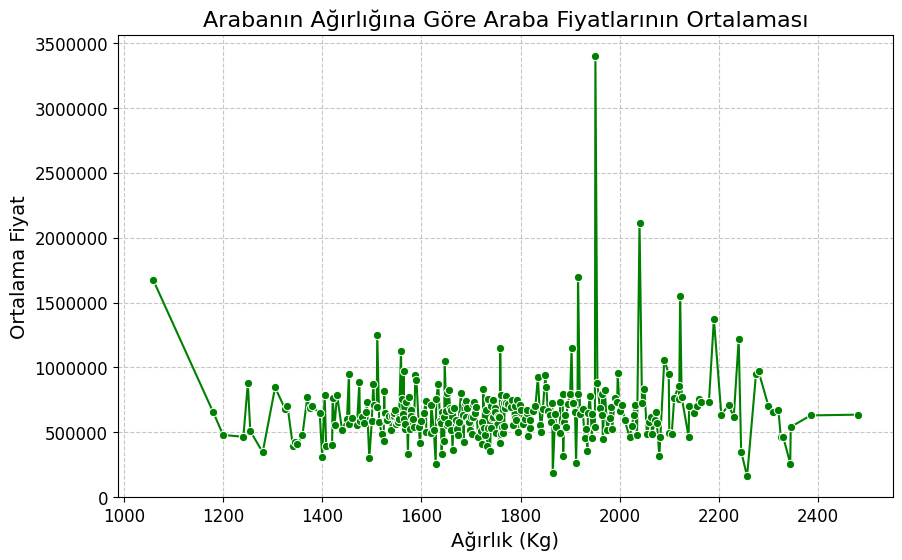

In [321]:
ortalama_fiyatlar = df.groupby('Agirlik')['Fiyat'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(x='Agirlik', y='Fiyat', data=ortalama_fiyatlar, marker='o', color='green')

plt.ticklabel_format(style='plain', axis='y')

plt.title('Arabanın Ağırlığına Göre Araba Fiyatlarının Ortalaması', fontsize=16)
plt.xlabel('Ağırlık (Kg)', fontsize=14)
plt.ylabel('Ortalama Fiyat', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)

plt.show()

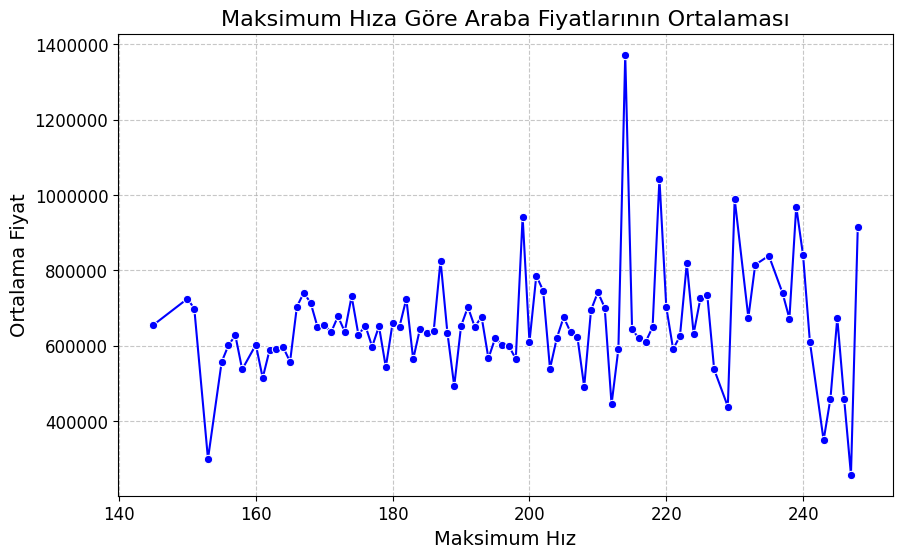

In [322]:
ortalama_fiyatlar = df.groupby('Maksimum Hız')['Fiyat'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Maksimum Hız', y='Fiyat', data=ortalama_fiyatlar, marker='o', color='blue')

plt.ticklabel_format(style='plain', axis='y')
plt.title('Maksimum Hıza Göre Araba Fiyatlarının Ortalaması', fontsize=16)
plt.xlabel('Maksimum Hız', fontsize=14)
plt.ylabel('Ortalama Fiyat', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)

plt.show()

In [323]:
############################

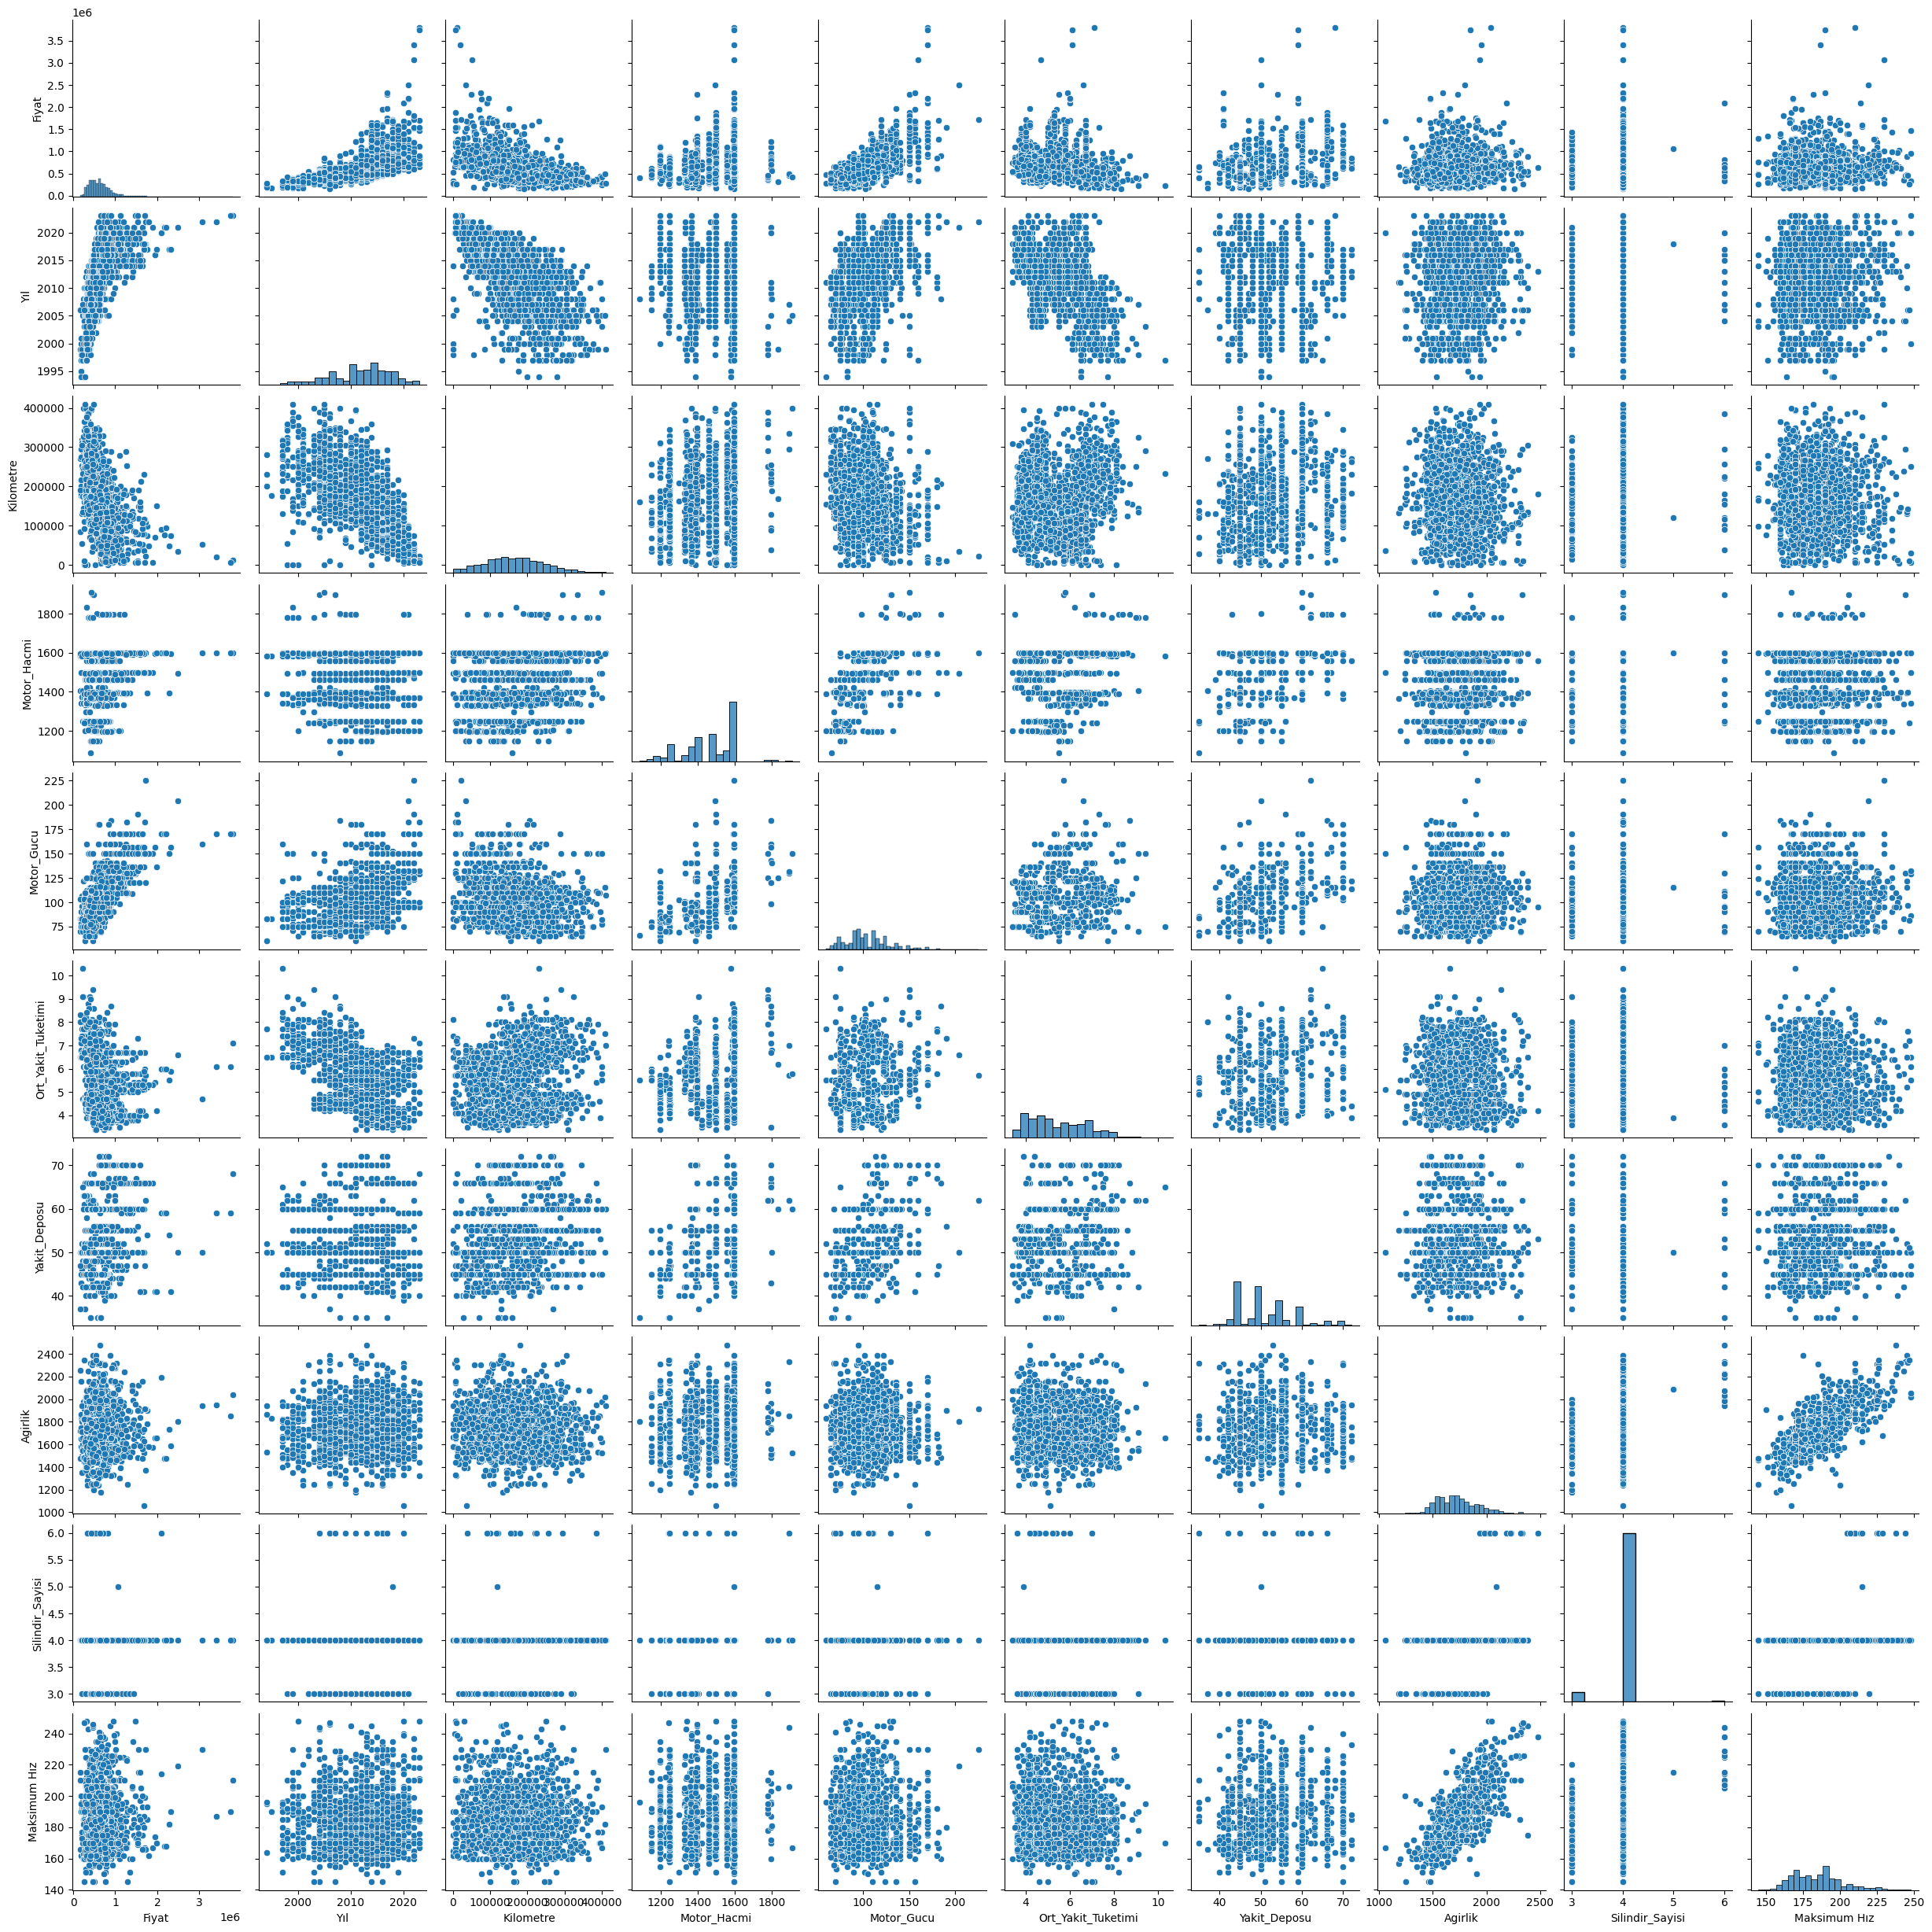

In [324]:
sns.pairplot(df)

In [325]:
df.to_csv("cardata_for_model.csv",index=False)

In [326]:
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


#warning
import warnings
warnings.filterwarnings("ignore")


pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)

In [327]:
df = pd.read_csv("cardata_for_model.csv")

In [328]:
df.head()

Fiyat       Marka   Yıl  Kilometre Vites Tipi Yakıt Tipi Kasa Tipi      Renk  Motor_Hacmi  Motor_Gucu        Çekiş  Ort_Yakit_Tuketimi  Yakit_Deposu  Agirlik  Silindir_Sayisi  Maksimum Hız
0 1475000.00       Honda  2023    6100.00   Otomatik     Benzin     Sedan      Mavi         1498         129  Önden Çekiş                6.50            47     2050             4.00           248
1  610000.00  Volkswagen  2008  210000.00        Düz     Benzin     Sedan  Lacivert         1598         115  Önden Çekiş                7.50            70     1548             4.00           180
2  715000.00        Fiat  2020   69000.00        Düz     Benzin     Sedan     Beyaz         1368          95  Önden Çekiş                5.70            45     1548             4.00           180
3  620000.00     Hyundai  2012  199000.00   Otomatik      Dizel     Sedan      Füme         1582         128  Önden Çekiş                5.60            43     1798             4.00           200
4  618000.00     Citroen  2021  101000.00        Düz      Dizel     Sedan     Beyaz         1499         100  Önden Çekiş                3.90            50     1675             4.00           185

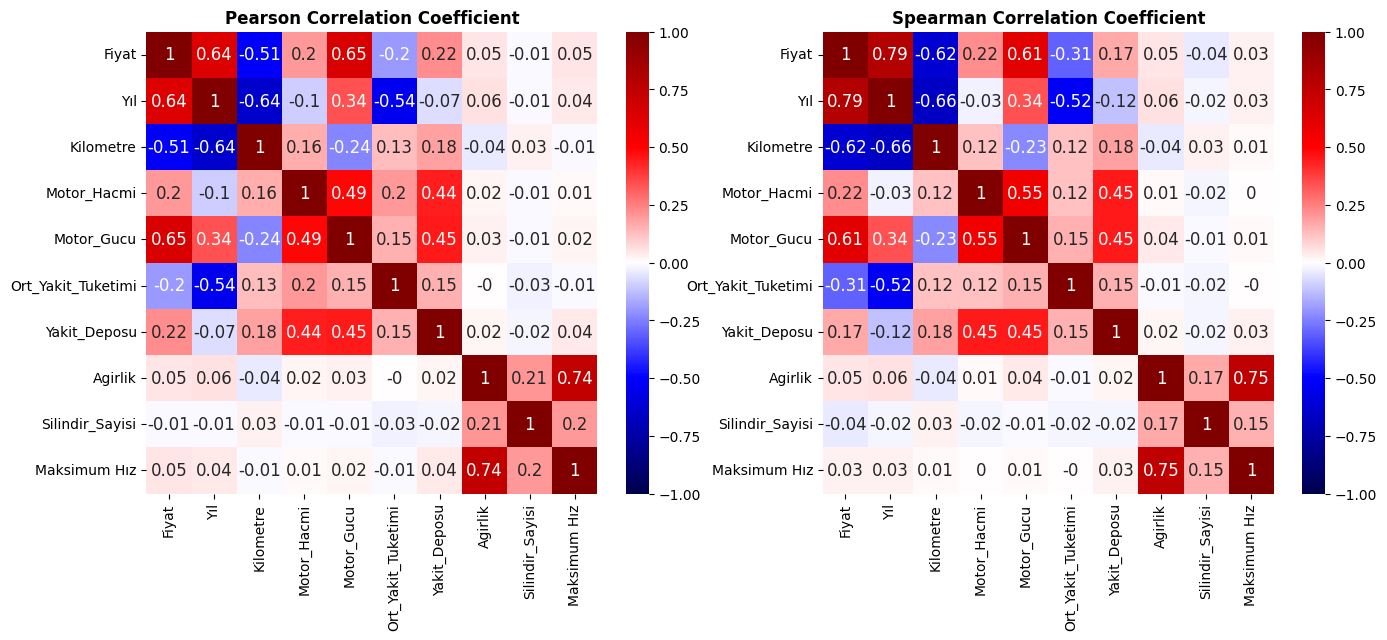

In [329]:
# Sayısal olmayan sütunları filtrele
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Sayısal sütunları içeren bir alt küme oluştur
numeric_df = df[numeric_columns]

# Korelasyon matrisini hesapla
correlation_pearson = numeric_df.corr(method='pearson')
correlation_spearman = numeric_df.corr(method='spearman')

# Plotting
plt.figure(figsize=[16, 6])

plt.subplot(1, 2, 1)
plt.title('Pearson Correlation Coefficient', weight='bold')
sns.heatmap(correlation_pearson.round(2), cmap="seismic", annot=True, vmin=-1, vmax=1, annot_kws={"size": 12})

plt.subplot(1, 2, 2)
plt.title('Spearman Correlation Coefficient', weight='bold')
sns.heatmap(correlation_spearman.round(2), cmap="seismic", annot=True, vmin=-1, vmax=1, annot_kws={"size": 12})

plt.show()


In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1661 entries, 0 to 1660
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Fiyat               1661 non-null   float64
 1   Marka               1661 non-null   object 
 2   Yıl                 1661 non-null   int64  
 3   Kilometre           1661 non-null   float64
 4   Vites Tipi          1661 non-null   object 
 5   Yakıt Tipi          1661 non-null   object 
 6   Kasa Tipi           1661 non-null   object 
 7   Renk                1661 non-null   object 
 8   Motor_Hacmi         1661 non-null   int64  
 9   Motor_Gucu          1661 non-null   int64  
 10  Çekiş               1661 non-null   object 
 11  Ort_Yakit_Tuketimi  1661 non-null   float64
 12  Yakit_Deposu        1661 non-null   int64  
 13  Agirlik             1661 non-null   int64  
 14  Silindir_Sayisi     1661 non-null   float64
 15  Maksimum Hız        1661 non-null   int64  
dtypes: flo

In [331]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


categorical_columns = ['Marka', 'Vites Tipi', 'Yakıt Tipi', 'Kasa Tipi', 'Renk', 'Çekiş']


corr_matrix_df = pd.DataFrame(index=categorical_columns, columns=categorical_columns)


for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            
            corr_value = cramers_v(df[col1], df[col2])
            corr_matrix_df.loc[col1, col2] = corr_value


print("Kramers V Korelasyon Matrisi:")
print(corr_matrix_df)

Kramers V Korelasyon Matrisi:
           Marka Vites Tipi Yakıt Tipi Kasa Tipi Renk Çekiş
Marka        NaN       0.47       0.37      0.22 0.16  0.74
Vites Tipi  0.47        NaN       0.27      0.05 0.13  0.22
Yakıt Tipi  0.37       0.27        NaN      0.09 0.15  0.24
Kasa Tipi   0.22       0.05       0.09       NaN 0.38  0.09
Renk        0.16       0.13       0.15      0.38  NaN  0.36
Çekiş       0.74       0.22       0.24      0.09 0.36   NaN


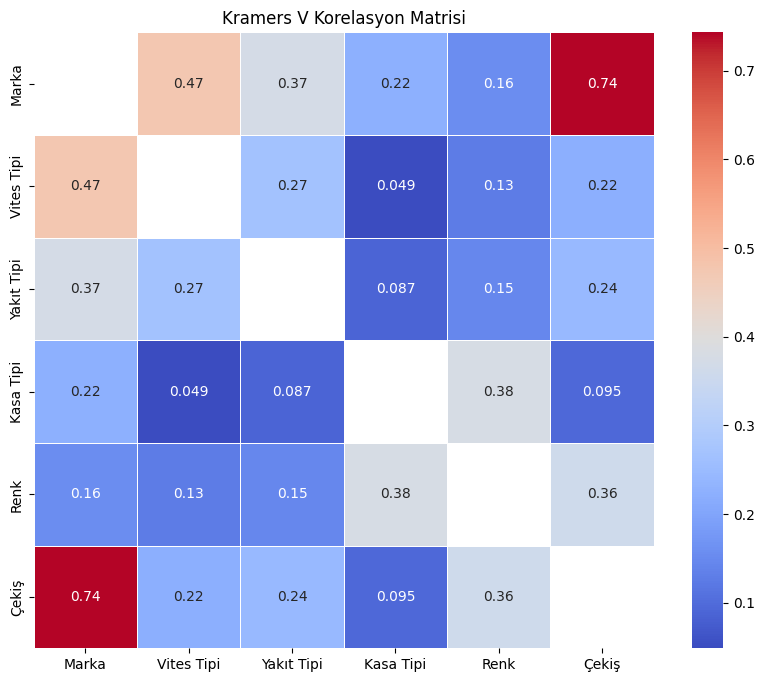

In [332]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_df.astype(float), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Kramers V Korelasyon Matrisi')
plt.show()

In [333]:
df

Fiyat       Marka   Yıl  Kilometre     Vites Tipi    Yakıt Tipi    Kasa Tipi      Renk  Motor_Hacmi  Motor_Gucu         Çekiş  Ort_Yakit_Tuketimi  Yakit_Deposu  Agirlik  Silindir_Sayisi  Maksimum Hız
0    1475000.00       Honda  2023    6100.00       Otomatik        Benzin        Sedan      Mavi         1498         129   Önden Çekiş                6.50            47     2050             4.00           248
1     610000.00  Volkswagen  2008  210000.00            Düz        Benzin        Sedan  Lacivert         1598         115   Önden Çekiş                7.50            70     1548             4.00           180
2     715000.00        Fiat  2020   69000.00            Düz        Benzin        Sedan     Beyaz         1368          95   Önden Çekiş                5.70            45     1548             4.00           180
3     620000.00     Hyundai  2012  199000.00       Otomatik         Dizel        Sedan      Füme         1582         128   Önden Çekiş                5.60            43     1798             4.00           200
4     618000.00     Citroen  2021  101000.00            Düz         Dizel        Sedan     Beyaz         1499         100   Önden Çekiş                3.90            50     1675             4.00           185
...         ...         ...   ...        ...            ...           ...          ...       ...          ...         ...           ...                 ...           ...      ...              ...           ...
1656  470999.00     Renault  2013  256000.00            Düz        Benzin  Hatchback/5     Bordo         1149          75   Önden Çekiş                5.50            45     1450             4.00           170
1657  642000.00         BMW  2011  132000.00       Otomatik  LPG & Benzin  Hatchback/5     Beyaz         1596         116  Arkadan İtiş                7.50            53     1675             4.00           185
1658  430000.00     Peugeot  2007  285000.00            Düz         Dizel        Sedan     Siyah         1560         112   Önden Çekiş                5.30            66     1790             4.00           205
1659  788000.00  Volkswagen  2014  135000.00  Yarı Otomatik         Dizel        Sedan      Füme         1598         105   Önden Çekiş                4.70            55     1990             4.00           215
1660  405000.00        Fiat  2007  175000.00            Düz  LPG & Benzin  Hatchback/3       Gri         1368          77   Önden Çekiş                5.90            45     1605             4.00           162

[1661 rows x 16 columns]

In [334]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

In [335]:
numeric_df.head()

Fiyat   Yıl  Kilometre  Motor_Hacmi  Motor_Gucu  Ort_Yakit_Tuketimi  Yakit_Deposu  Agirlik  Silindir_Sayisi  Maksimum Hız
0 1475000.00  2023    6100.00         1498         129                6.50            47     2050             4.00           248
1  610000.00  2008  210000.00         1598         115                7.50            70     1548             4.00           180
2  715000.00  2020   69000.00         1368          95                5.70            45     1548             4.00           180
3  620000.00  2012  199000.00         1582         128                5.60            43     1798             4.00           200
4  618000.00  2021  101000.00         1499         100                3.90            50     1675             4.00           185

In [336]:
numeric_df.columns = numeric_df.columns.str.replace('.', '_')
numeric_df.columns = numeric_df.columns.str.replace(' ', '_')
numeric_df.columns = numeric_df.columns.str.replace('.', '_')


In [337]:
# Model 1
ols_lm = smf.ols('Fiyat ~ Yıl + Kilometre + Motor_Hacmi + Motor_Gucu + Ort_Yakit_Tuketimi + Yakit_Deposu + Agirlik + Maksimum_Hız', data=numeric_df)
model_1 = ols_lm.fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Fiyat   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     389.9
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        18:42:18   Log-Likelihood:                -22566.
No. Observations:                1661   AIC:                         4.515e+04
Df Residuals:                    1652   BIC:                         4.520e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -3.423e+07   3.05e+06    -11.236      0.000   -4.02e+07   -2.83e+07
Yıl                 1.696e+04   1503.178     11.283      0.000     1.4e+04    1.99e+04
Kilometre             -0.8620      0.083    -10.428      0.000      -1.024      -0.700
Motor_Hacmi           59.5001     43.003      1.384      0.167     -24.847     143.847
Motor_Gucu          6786.5333    310.843     21.833      0.000    6176.846    7396.221
Ort_Yakit_Tuketimi -2.567e+04   5309.831     -4.835      0.000   -3.61e+04   -1.53e+04
Yakit_Deposu        3375.6842    822.485      4.104      0.000    1762.461    4988.907
Agirlik              -40.6223     35.161     -1.155      0.248    -109.588      28.343
Maksimum_Hız         835.9846    402.340      2.078      0.038      46.835    1625.134
==============================================================================
Omnibus:                     1509.449   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           102776.963
Skew:                           3.975   Prob(JB):                         0.00
Kurtosis:                      40.707   Cond. No.                     1.20e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [338]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Bağımsız değişkenlere sabit terim ekleyerek X matrisini oluştur
X = sm.add_constant(numeric_df[['Yıl', 'Kilometre', 'Motor_Hacmi', 'Motor_Gucu', 'Ort_Yakit_Tuketimi', 'Yakit_Deposu', 'Agirlik', 'Maksimum_Hız']])

# Bağımsız değişkenlerin VIF değerlerini hesapla
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sonuçları görüntüle
print(vif_data)

             Variable       VIF
0               const 414544.49
1                 Yıl      3.40
2           Kilometre      2.01
3         Motor_Hacmi      1.56
4          Motor_Gucu      2.23
5  Ort_Yakit_Tuketimi      1.96
6        Yakit_Deposu      1.46
7             Agirlik      2.21
8        Maksimum_Hız      2.20


In [339]:
## Sayısal değişkenlerimin VIF değerleri 5 ten küçük olduğu için benim modelimde multicollinearity sorunu yok.

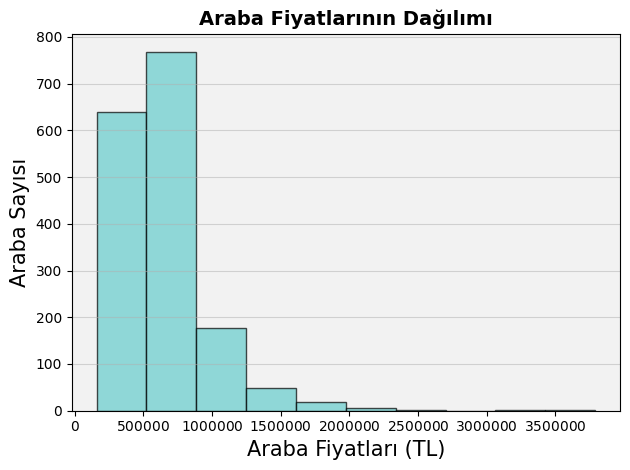

In [340]:
from matplotlib.ticker import ScalarFormatter
plt.hist(df['Fiyat'], bins=10, edgecolor='black', color='#66CCCC', alpha=0.7)
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='x')

plt.xlabel('Araba Fiyatları (TL)', fontsize=15)
plt.ylabel('Araba Sayısı', fontsize=15)
plt.title('Araba Fiyatlarının Dağılımı', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.5)
plt.gca().set_facecolor('#F2F2F2')
plt.tight_layout()
plt.show()

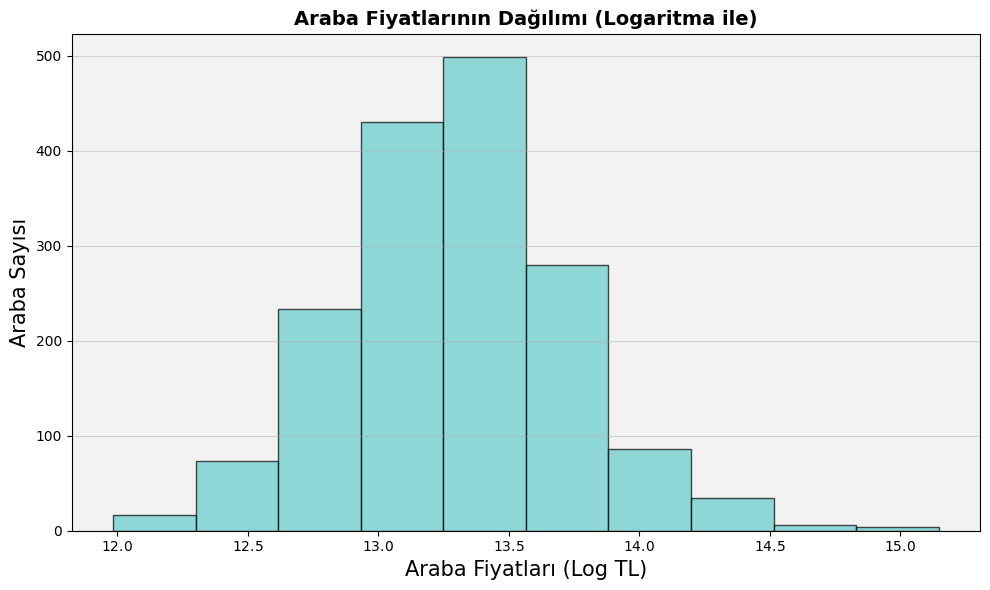

In [341]:
plt.figure(figsize=[10, 6])
plt.hist(np.log1p(df['Fiyat']), bins=10, edgecolor='black', color='#66CCCC', alpha=0.7)
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='x')

plt.xlabel('Araba Fiyatları (Log TL)', fontsize=15)
plt.ylabel('Araba Sayısı', fontsize=15)
plt.title('Araba Fiyatlarının Dağılımı (Logaritma ile)', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.5)
plt.gca().set_facecolor('#F2F2F2')
plt.tight_layout()
plt.show()

In [342]:
numeric_df['Log_Fiyat'] = np.log(numeric_df['Fiyat'])
# Model 2
ols_lm_log = smf.ols('Log_Fiyat ~Yıl + Kilometre + Motor_Hacmi + Motor_Gucu + Ort_Yakit_Tuketimi + Yakit_Deposu + Agirlik + Maksimum_Hız', data=numeric_df)
model_2 = ols_lm_log.fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Log_Fiyat   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     800.4
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        18:42:20   Log-Likelihood:                 358.47
No. Observations:                1661   AIC:                            -698.9
Df Residuals:                    1652   BIC:                            -650.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -57.7271      3.089    -18.688      0.000     -63.786     -51.668
Yıl                    0.0348      0.002     22.838      0.000       0.032       0.038
Kilometre           -1.09e-06   8.38e-08    -13.000      0.000   -1.25e-06   -9.25e-07
Motor_Hacmi            0.0001   4.36e-05      3.371      0.001    6.15e-05       0.000
Motor_Gucu             0.0073      0.000     23.185      0.000       0.007       0.008
Ort_Yakit_Tuketimi    -0.0361      0.005     -6.702      0.000      -0.047      -0.026
Yakit_Deposu           0.0064      0.001      7.624      0.000       0.005       0.008
Agirlik            -2.834e-05   3.57e-05     -0.795      0.427   -9.83e-05    4.16e-05
Maksimum_Hız           0.0007      0.000      1.598      0.110      -0.000       0.001
==============================================================================
Omnibus:                       42.606   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.129
Skew:                           0.028   Prob(JB):                     8.11e-22
Kurtosis:                       4.183   Cond. No.                     1.20e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [343]:
data_1 = df.select_dtypes(include=['int64', 'float64'])
data_1["Vites Tipi"] = df["Vites Tipi"]

In [344]:
data_1.head()

Fiyat   Yıl  Kilometre  Motor_Hacmi  Motor_Gucu  Ort_Yakit_Tuketimi  Yakit_Deposu  Agirlik  Silindir_Sayisi  Maksimum Hız Vites Tipi
0 1475000.00  2023    6100.00         1498         129                6.50            47     2050             4.00           248   Otomatik
1  610000.00  2008  210000.00         1598         115                7.50            70     1548             4.00           180        Düz
2  715000.00  2020   69000.00         1368          95                5.70            45     1548             4.00           180        Düz
3  620000.00  2012  199000.00         1582         128                5.60            43     1798             4.00           200   Otomatik
4  618000.00  2021  101000.00         1499         100                3.90            50     1675             4.00           185        Düz

In [345]:
data_1 = pd.get_dummies(data_1, columns=['Vites Tipi'])
data_1.columns

Index(['Fiyat', 'Yıl', 'Kilometre', 'Motor_Hacmi', 'Motor_Gucu', 'Ort_Yakit_Tuketimi', 'Yakit_Deposu', 'Agirlik', 'Silindir_Sayisi', 'Maksimum Hız', 'Vites Tipi_Düz', 'Vites Tipi_Otomatik', 'Vites Tipi_Yarı Otomatik'], dtype='object')

In [346]:
data_1.columns = data_1.columns.str.replace('.', '_')
data_1.columns = data_1.columns.str.replace(' ', '_')
data_1.columns = data_1.columns.str.replace('.', '_')

In [347]:
data_1['Log_Fiyat'] = np.log(data_1['Fiyat'])

In [348]:
data_1.head()

Fiyat   Yıl  Kilometre  Motor_Hacmi  Motor_Gucu  Ort_Yakit_Tuketimi  Yakit_Deposu  Agirlik  Silindir_Sayisi  Maksimum_Hız  Vites_Tipi_Düz  Vites_Tipi_Otomatik  Vites_Tipi_Yarı_Otomatik  Log_Fiyat
0 1475000.00  2023    6100.00         1498         129                6.50            47     2050             4.00           248           False                 True                     False      14.20
1  610000.00  2008  210000.00         1598         115                7.50            70     1548             4.00           180            True                False                     False      13.32
2  715000.00  2020   69000.00         1368          95                5.70            45     1548             4.00           180            True                False                     False      13.48
3  620000.00  2012  199000.00         1582         128                5.60            43     1798             4.00           200           False                 True                     False      13.34
4  618000.00  2021  101000.00         1499         100                3.90            50     1675             4.00           185            True                False                     False      13.33

In [376]:
formula = 'Log_Fiyat ~Yıl + Kilometre + Motor_Hacmi + Motor_Gucu + Ort_Yakit_Tuketimi + Yakit_Deposu + Agirlik + Maksimum_Hız+ Vites_Tipi_Düz + Vites_Tipi_Otomatik + Vites_Tipi_Yarı_Otomatik'
model_3 = smf.ols(formula=formula, data=data_1).fit()

In [377]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Log_Fiyat   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     736.7
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        18:58:11   Log-Likelihood:                 453.14
No. Observations:                1661   AIC:                            -884.3
Df Residuals:                    1650   BIC:                            -824.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                          -40.9825      2.201    -18.622      0.000     -45.299     -36.666
Vites_Tipi_Düz[T.True]             -13.7634      0.733    -18.774      0.000     -15.201     -12.326
Vites_Tipi_Otomatik[T.True]        -13.5978      0.734    -18.513      0.000     -15.038     -12.157
Vites_Tipi_Yarı_Otomatik[T.True]   -13.6212      0.733    -18.575      0.000     -15.059     -12.183
Yıl                                  0.0334      0.001     23.056      0.000       0.031       0.036
Kilometre                         -9.98e-07   7.95e-08    -12.548      0.000   -1.15e-06   -8.42e-07
Motor_Hacmi                          0.0001   4.13e-05      2.832      0.005    3.59e-05       0.000
Motor_Gucu                           0.0059      0.000     18.626      0.000       0.005       0.006
Ort_Yakit_Tuketimi                  -0.0368      0.005     -6.888      0.000      -0.047      -0.026
Yakit_Deposu                         0.0071      0.001      8.819      0.000       0.005       0.009
Agirlik                          -3.078e-05   3.37e-05     -0.913      0.361   -9.69e-05    3.53e-05
Maksimum_Hız                         0.0007      0.000      1.785      0.074    -6.8e-05       0.001
==============================================================================
Omnibus:                       56.675   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.714
Skew:                           0.059   Prob(JB):                     3.09e-33
Kurtosis:                       4.466   Cond. No.                     1.53e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.45e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [378]:
data_2 = data_1.copy()

In [379]:
data_2["Marka"] = df["Marka"]

In [380]:
data_2.drop(["Fiyat"], inplace=True, axis=1)

In [381]:
data_2 = pd.get_dummies(data_2, columns=['Marka'])
data_2.columns

Index(['Yıl', 'Kilometre', 'Motor_Hacmi', 'Motor_Gucu', 'Ort_Yakit_Tuketimi', 'Yakit_Deposu', 'Agirlik', 'Silindir_Sayisi', 'Maksimum_Hız', 'Vites_Tipi_Düz', 'Vites_Tipi_Otomatik', 'Vites_Tipi_Yarı_Otomatik', 'Log_Fiyat', 'Marka_Audi', 'Marka_BMW', 'Marka_Chevrolet', 'Marka_Citroen', 'Marka_Cupra', 'Marka_DS Automobiles', 'Marka_Dacia', 'Marka_Daihatsu', 'Marka_Fiat', 'Marka_Ford', 'Marka_Geely', 'Marka_Honda', 'Marka_Hyundai', 'Marka_Kia', 'Marka_Lada', 'Marka_MINI', 'Marka_Mazda',
       'Marka_Mercedes - Benz', 'Marka_Mitsubishi', 'Marka_Nissan', 'Marka_Opel', 'Marka_Peugeot', 'Marka_Renault', 'Marka_Seat', 'Marka_Skoda', 'Marka_Suzuki', 'Marka_Tata', 'Marka_Tofaş', 'Marka_Toyota', 'Marka_Volkswagen', 'Marka_Volvo'],
      dtype='object')

In [382]:
data_2

Yıl  Kilometre  Motor_Hacmi  Motor_Gucu  Ort_Yakit_Tuketimi  Yakit_Deposu  Agirlik  Silindir_Sayisi  Maksimum_Hız  Vites_Tipi_Düz  Vites_Tipi_Otomatik  Vites_Tipi_Yarı_Otomatik  Log_Fiyat  Marka_Audi  Marka_BMW  Marka_Chevrolet  Marka_Citroen  Marka_Cupra  Marka_DS Automobiles  Marka_Dacia  Marka_Daihatsu  Marka_Fiat  Marka_Ford  Marka_Geely  Marka_Honda  Marka_Hyundai  Marka_Kia  Marka_Lada  Marka_MINI  Marka_Mazda  Marka_Mercedes - Benz  Marka_Mitsubishi  Marka_Nissan  Marka_Opel  \
0     2023    6100.00         1498         129                6.50            47     2050             4.00           248           False                 True                     False      14.20       False      False            False          False        False                 False        False           False       False       False        False         True          False      False       False       False        False                  False             False         False       False   
1     2008  210000.00         1598         115                7.50            70     1548             4.00           180            True                False                     False      13.32       False      False            False          False        False                 False        False           False       False       False        False        False          False      False       False       False        False                  False             False         False       False   
2     2020   69000.00         1368          95                5.70            45     1548             4.00           180            True                False                     False      13.48       False      False            False          False        False                 False        False           False        True       False        False        False          False      False       False       False        False                  False             False         False       False   
3     2012  199000.00         1582         128                5.60            43     1798             4.00           200           False                 True                     False      13.34       False      False            False          False        False                 False        False           False       False       False        False        False           True      False       False       False        False                  False             False         False       False   
4     2021  101000.00         1499         100                3.90            50     1675             4.00           185            True                False                     False      13.33       False      False            False           True        False                 False        False           False       False       False        False        False          False      False       False       False        False                  False             False         False       False   
...    ...        ...          ...         ...                 ...           ...      ...              ...           ...             ...                  ...                       ...        ...         ...        ...              ...            ...          ...                   ...          ...             ...         ...         ...          ...          ...            ...        ...         ...         ...          ...                    ...               ...           ...         ...   
1656  2013  256000.00         1149          75                5.50            45     1450             4.00           170            True                False                     False      13.06       False      False            False          False        False                 False        False           False       False       False        False        False          False      False       False       False        False                  False             False         False       False   
1657  2011  132000.00         1

In [419]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# X ve y'yi tanımlayın, tüm girişlerin sayısal olduğundan emin olun
X = data_2.drop('Log_Fiyat', axis=1)
y = data_2['Log_Fiyat']

# Modeli oluşturun
model_4 = sm.OLS(y, X.astype(float)).fit()

# Model özetini görüntüleyin
print(model_4.summary())




                            OLS Regression Results                            
Dep. Variable:              Log_Fiyat   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     382.7
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:27:10   Log-Likelihood:                 1010.4
No. Observations:                1661   AIC:                            -1937.
Df Residuals:                    1619   BIC:                            -1709.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Yıl                     

In [ ]:
###### Scikit-Learn Modelling

In [420]:
df.head()

Fiyat       Marka   Yıl  Kilometre Vites Tipi Yakıt Tipi Kasa Tipi      Renk  Motor_Hacmi  Motor_Gucu        Çekiş  Ort_Yakit_Tuketimi  Yakit_Deposu  Agirlik  Silindir_Sayisi  Maksimum Hız
0 1475000.00       Honda  2023    6100.00   Otomatik     Benzin     Sedan      Mavi         1498         129  Önden Çekiş                6.50            47     2050             4.00           248
1  610000.00  Volkswagen  2008  210000.00        Düz     Benzin     Sedan  Lacivert         1598         115  Önden Çekiş                7.50            70     1548             4.00           180
2  715000.00        Fiat  2020   69000.00        Düz     Benzin     Sedan     Beyaz         1368          95  Önden Çekiş                5.70            45     1548             4.00           180
3  620000.00     Hyundai  2012  199000.00   Otomatik      Dizel     Sedan      Füme         1582         128  Önden Çekiş                5.60            43     1798             4.00           200
4  618000.00     Citroen  2021  101000.00        Düz      Dizel     Sedan     Beyaz         1499         100  Önden Çekiş                3.90            50     1675             4.00           185

In [421]:
df.drop(["Renk"], inplace=True, axis=1)

In [423]:
X = df.drop(["Fiyat"],axis=1)
y = df["Fiyat"]

In [424]:
y = np.log1p(df["Fiyat"])
X = pd.get_dummies(X , columns=["Marka","Vites Tipi", "Yakıt Tipi", "Kasa Tipi", "Çekiş"])

In [425]:
X.head()

Yıl  Kilometre  Motor_Hacmi  Motor_Gucu  Ort_Yakit_Tuketimi  Yakit_Deposu  Agirlik  Silindir_Sayisi  Maksimum Hız  Marka_Audi  Marka_BMW  Marka_Chevrolet  Marka_Citroen  Marka_Cupra  Marka_DS Automobiles  Marka_Dacia  Marka_Daihatsu  Marka_Fiat  Marka_Ford  Marka_Geely  Marka_Honda  Marka_Hyundai  Marka_Kia  Marka_Lada  Marka_MINI  Marka_Mazda  Marka_Mercedes - Benz  Marka_Mitsubishi  Marka_Nissan  Marka_Opel  Marka_Peugeot  Marka_Renault  Marka_Seat  Marka_Skoda  Marka_Suzuki  Marka_Tata  \
0  2023    6100.00         1498         129                6.50            47     2050             4.00           248       False      False            False          False        False                 False        False           False       False       False        False         True          False      False       False       False        False                  False             False         False       False          False          False       False        False         False       False   
1  2008  210000.00         1598         115                7.50            70     1548             4.00           180       False      False            False          False        False                 False        False           False       False       False        False        False          False      False       False       False        False                  False             False         False       False          False          False       False        False         False       False   
2  2020   69000.00         1368          95                5.70            45     1548             4.00           180       False      False            False          False        False                 False        False           False        True       False        False        False          False      False       False       False        False                  False             False         False       False          False          False       False        False         False       False   
3  2012  199000.00         1582         128                5.60            43     1798             4.00           200       False      False            False          False        False                 False        False           False       False       False        False        False           True      False       False       False        False                  False             False         False       False          False          False       False        False         False       False   
4  2021  101000.00         1499         100                3.90            50     1675             4.00           185       False      False            False           True        False                 False        False           False       False       False        False        False          False      False       False       False        False                  False             False         False       False          False          False       False        False         False       False   

   Marka_Tofaş  Marka_Toyota  Marka_Volkswagen  Marka_Volvo  Vites Tipi_Düz  Vites Tipi_Otomatik  Vites Tipi_Yarı Otomatik  Yakıt Tipi_Benzin  Yakıt Tipi_Dizel  Yakıt Tipi_Hibrit  Yakıt Tipi_LPG & Benzin  Kasa Tipi_Bilinmiyor  Kasa Tipi_Hatchback/3  Kasa Tipi_Hatchback/5  Kasa Tipi_MPV  Kasa Tipi_Sedan  Kasa Tipi_Station wagon  Çekiş_4WD (Sürekli)  Çekiş_Arkadan İtiş  Çekiş_Önden Çekiş  
0        False         False             False        False           False                 True                     False               True             False              False                    False                 False                  False                  False          False             True                    False                False               False               True  
1        False         False              True        False            True                False                     False               True             False              False                    False            

In [426]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, test_size=0.25, random_state=35)

print('X Train:', x_train.shape)
print('X Validation:', x_cv.shape)
print('X test:', x_test.shape)

X Train: (996, 56)
X Validation: (332, 56)
X test: (333, 56)


In [427]:
lreg_1 = LinearRegression()

lreg_1.fit(x_train,y_train)

pred = lreg_1.predict(x_train)

# RMSE Hesabı
print("RMSE: ", np.sqrt(mean_squared_error(y_train, pred)))

# R2 Skor
print("R2 Score: ", r2_score(y_train, pred))

RMSE:  0.12405288054327344
R2 Score:  0.9145549695084536


In [428]:
lreg_1.coef_

array([ 3.32188436e-02, -1.18420937e-06,  6.39431255e-05,  3.48600040e-03,
       -4.73685135e-02,  7.20490575e-03,  5.04391767e-06, -8.54779231e-03,
       -4.80703870e-05,  3.72817466e-01,  2.62063789e-01, -1.48743624e-01,
       -8.02420836e-02,  2.35347070e-01,  2.92191899e-01, -7.42758482e-02,
        6.72502245e-02, -1.12798296e-01,  5.90496416e-02, -4.48880512e-01,
        1.84348084e-01, -5.18292337e-03, -2.03725674e-02, -5.07150800e-01,
       -4.16333634e-17,  8.08484765e-02,  4.21724404e-01, -6.09651099e-02,
        5.52583436e-02,  9.22671775e-03, -9.15570457e-02, -3.84506853e-02,
        1.13264823e-01,  1.76329098e-01,  2.22044605e-16, -4.14278632e-01,
       -6.52319695e-01,  6.56055468e-02,  1.83933249e-01,  7.59589923e-02,
       -4.96775716e-02,  2.54941753e-02,  2.41833963e-02,  3.38167556e-03,
       -2.46217849e-02, -1.61977275e-02,  3.74378369e-02,  1.15435088e-02,
       -2.94564457e-02, -2.20833442e-02,  3.30501563e-03, -1.00651058e-02,
        4.67563713e-02,  

In [ ]:
# Validation

In [429]:
lreg_1_cv = LinearRegression()

lreg_1_cv.fit(x_train,y_train)

pred = lreg_1_cv.predict(x_cv)

# R2 Skor
print("Validation R2 Score:", r2_score(y_cv, pred))

Validation R2 Score: 0.8994006701954127


In [430]:
real_pred = np.exp(pred)
real_y_cv = np.exp(y_cv.values)

print(f'Actual: {real_y_cv[:5].round(3)},\nPredicted: {real_pred[:5].round(3)}')

Actual: [1399851.  699001. 1065001.  620001.  300001.],
Predicted: [1414656.333  705621.183 1024045.673  587432.308  331798.433]


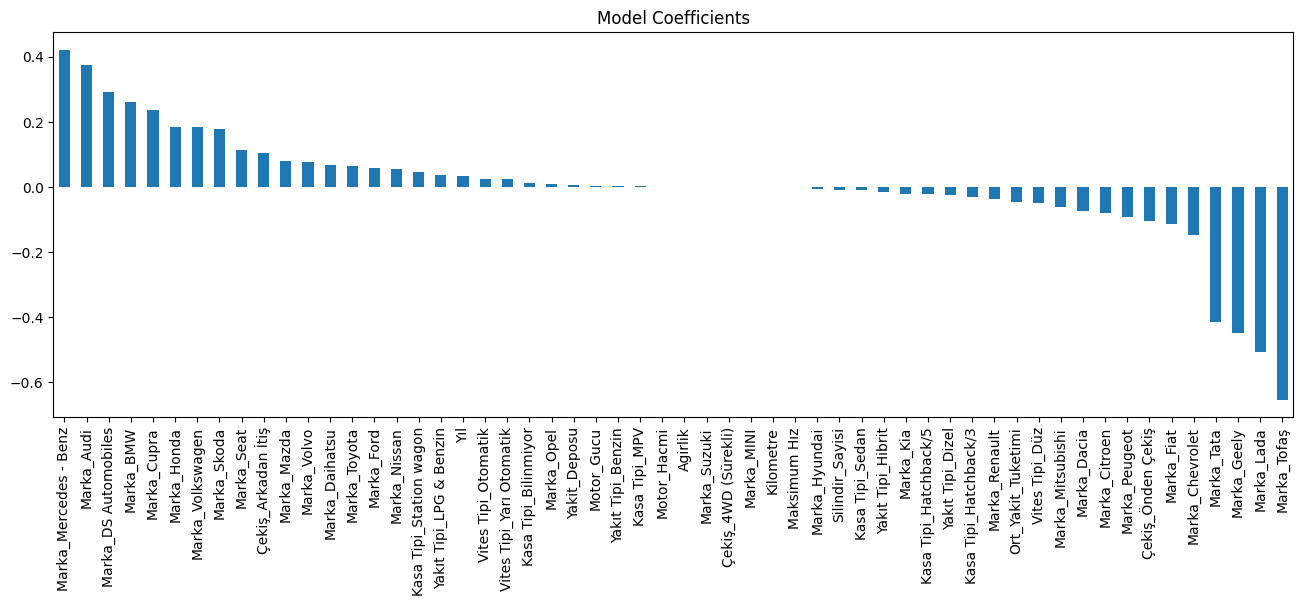

In [431]:
predictors = x_train.columns
coef = pd.Series(lreg_1_cv.coef_,predictors).sort_values(ascending=False)
plt.figure(figsize=[16,5])
coef.plot(kind='bar', title='Model Coefficients');

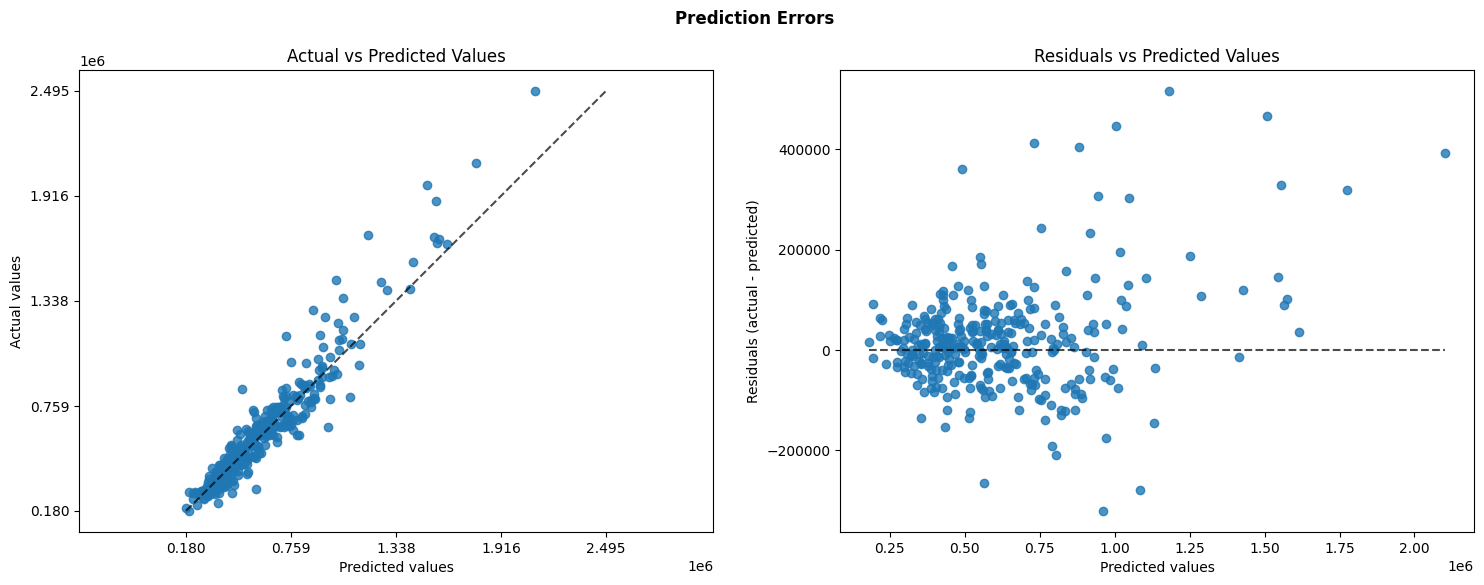

In [432]:
from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(1, 2, figsize=[18,6])
fig.suptitle("Prediction Errors", weight="bold")

PredictionErrorDisplay.from_predictions(real_y_cv, real_pred, kind="actual_vs_predicted", ax=axs[0])
axs[0].set_title("Actual vs Predicted Values")

PredictionErrorDisplay.from_predictions(real_y_cv, real_pred, kind="residual_vs_predicted", ax=axs[1])
axs[1].set_title("Residuals vs Predicted Values");

In [ ]:
# Ana model

In [433]:
lreg_3 = LinearRegression()

lreg_3.fit(x_train,y_train)

pred = lreg_3.predict(x_test)

# R2 Skor
print("R2 Score:", r2_score(y_test, pred))

R2 Score: 0.8852052910299044


In [434]:
from sklearn.metrics import mean_squared_error
pred = lreg_3.predict(x_test)

# MSE değerini hesapla
mse = mean_squared_error(y_test, pred)

# MSE değerini yazdır
print("MSE Değeri (lreg_3):", mse)


MSE Değeri (lreg_3): 0.02085794340828077


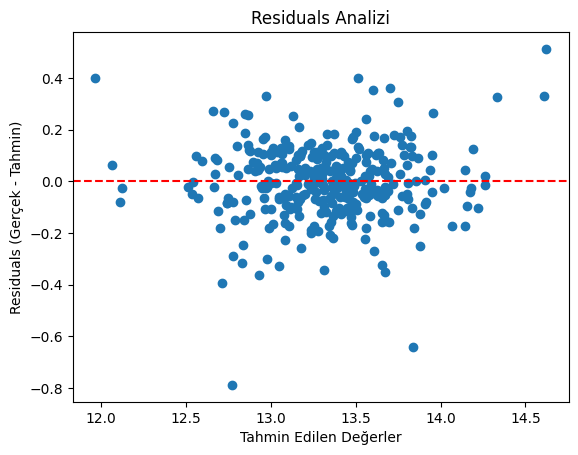

In [435]:
residuals = y_test - pred
plt.scatter(pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Tahmin Edilen Değerler")
plt.ylabel("Residuals (Gerçek - Tahmin)")
plt.title("Residuals Analizi")
plt.show()

In [436]:
X = df.drop(["Fiyat"],axis=1)
X = pd.get_dummies(X , columns=["Marka","Vites Tipi", "Yakıt Tipi", "Kasa Tipi", "Çekiş"])
y = df["Fiyat"]

In [437]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

In [438]:
lreg_3 = LinearRegression()

lreg_3.fit(x_train,y_train)

pred = lreg_3.predict(x_test)

# R2 Skor
print("R2 Score:", r2_score(y_test, pred))

R2 Score: 0.7282220911181951


In [439]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, r2_score
cv_scores = cross_val_score(lreg_3, x_train, y_train, cv=10, scoring=make_scorer(r2_score))

print("Çapraz Doğrulama Skorları:")
print(cv_scores)

print(f"Ortalama R2 Skoru: {cv_scores.mean():.4f}")

Çapraz Doğrulama Skorları:
[0.83488617 0.86287191 0.82480879 0.64092758 0.82293041 0.82843323
 0.88607956 0.76773128 0.69020129 0.87096547]
Ortalama R2 Skoru: 0.8030


In [440]:
import tkinter as tk
from tkinter import ttk

In [442]:
class LinearRegressionApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Linear Regression Model App")
        self.root.geometry("800x600")

        # Stil konfigürasyonu
        style = ttk.Style()
        style.configure("Main.TFrame", background="#37474f")  # Ana frame arkaplan rengi
        style.configure("TFrame", background="#f0f0f0")       # Giriş frame arkaplan rengi
        style.configure("TLabel", background="#f0f0f0", font=("Arial", 12), padding=5, foreground="#212121")  # Etiketler
        style.configure("TEntry", padding=5)                  # Giriş kutuları
        style.configure("TButton", background="#4caf50", foreground="white", font=("Arial", 12), padding=10)  # Düğme
        style.configure("TLabel", background="#f0f0f0", font=("Arial", 14, "bold"), padding=10, foreground="#e91e63")  # Tahmin sonucu etiketi

        # Ana frame
        main_frame = ttk.Frame(self.root, style="Main.TFrame")
        main_frame.pack(fill=tk.BOTH, expand=True)

        # Scrollbar ve Canvas oluştur
        self.canvas = tk.Canvas(main_frame, bg="#f0f0f0")
        self.scrollbar = ttk.Scrollbar(main_frame, orient="vertical", command=self.canvas.yview)
        self.scrollable_frame = ttk.Frame(self.canvas, style="TFrame")

        # Giriş verileri için etiketler ve giriş kutuları
        self.input_entries = {}
        for row, column in enumerate(x_train.columns):
            ttk.Label(self.scrollable_frame, text=column + ":", style="TLabel").grid(row=row, column=0, padx=10, pady=5, sticky="e")
            self.input_entries[column] = ttk.Entry(self.scrollable_frame, style="TEntry")
            self.input_entries[column].grid(row=row, column=1, padx=10, pady=5, sticky="w")

        # Canvas konfigürasyonu
        self.scrollable_frame.bind(
            "<Configure>",
            lambda e: self.canvas.configure(scrollregion=self.canvas.bbox("all"))
        )

        # Canvas içine frame ve scrollbar ekleyin
        self.canvas.create_window((0, 0), window=self.scrollable_frame, anchor="nw")
        self.canvas.configure(yscrollcommand=self.scrollbar.set)

        # Scrollbar ve Canvas'ı yerleştirin
        self.canvas.pack(side="left", fill="both", expand=True)
        self.scrollbar.pack(side="right", fill="y")

        # Tahmin butonu
        ttk.Button(main_frame, text="Tahmin Yap", command=self.predict, style="TButton").pack(pady=10)

        # Tahmin sonucu için etiket
        self.result_label = ttk.Label(main_frame, text="", style="TLabel")
        self.result_label.pack(pady=10)

        # Modeli oluştur ve eğit
        self.model = LinearRegression()
        self.model.fit(x_train, y_train)

    def predict(self):
        # Giriş verilerini al
        user_input = {}
        for column, entry in self.input_entries.items():
            try:
                user_input[column] = float(entry.get())
            except ValueError:
                self.result_label.config(text="Hatalı giriş. Sayı giriniz.")
                return

 
        user_input_df = pd.DataFrame([user_input])

        # Tahmin yap
        prediction = self.model.predict(user_input_df)

        

        # Tahmin sonucunu göster
        self.result_label.config(text=f"Tahmin: {prediction[0]:.2f}")


In [443]:
root = tk.Tk()
app = LinearRegressionApp(root)
root.mainloop()